<h1 style="text-align: center;"> Striver Arrays - Hard Problems </h1>

# 1. Pascal's Triangle :

# 2. Majority Element (n/3 times) :

## Problem Statement :

Given an integer array nums of size n. Return all elements which appear more than n/3 times in the array. The output can be returned in any order.


### Examples :

**Example 1:**
```
Input: nums = [1, 2, 1, 1, 3, 2]
Output: [1]

Explanation:

Here, n / 3 = 6 / 3 = 2.
Therefore the elements appearing 3 or more times is : [1].
```

**Example 2:**
```
Input: nums = [1, 2, 1, 1, 3, 2, 2]
Output: [1, 2]

Explanation:

Here, n / 3 = 7 / 3 = 2.
Therefore the elements appearing 3 or more times is : [1, 2].
```

**Example 3:**
```
Input: nums = [1, 2, 1, 1, 3, 2, 2, 3] (Give the solution sorted in ascending order)
Output: [1, 2].
```

```
Constraints:
n == nums.length.
2 <= n <= 10^5
-10^4 <= nums[i] <= 10^4
```

# Brute Force Solution

### Intuition

The naive way is to use nested loops to count the occurrences of each of the elements and if the count is greater than one third of the size of array, include the element in the answer.

### Can there be more than 2 majority elements ? Let's understand the scenario!

To understand why there can't be more than two majority elements (elements that appear more than n/3 times) in an array of size n, let's use a simple mathematical reasoning. A majority element in this context is defined as an element that appears more than n/3 times in the array. For an element to be a majority element, it must appear more than n/3 times. Let's assume there are more than two such majority elements. Let's denote these elements as A, B, and C.

Since each of these elements appears more than n/3 times, the combined frequency of these three elements would be: frequency of 𝐴 + frequency of 𝐵 + frequency of 𝐶 > 𝑛/3 + 𝑛/3 + 𝑛/3 = 𝑛

Now, the total number of occurrences of all elements in the array cannot exceed n, the size of the array. This means the combined frequency of any three elements each appearing more than n/3 times would exceed the total size of the array, which is a contradiction. Therefore, it's mathematically impossible for there to be more than two elements in the array that each appear more than n/3 tis.



### Approach

* Iterate in the array to select the elements of the array one by one. Now, for each unique element, run another loop and count its occurrence in the given array. If any element occurs more than the floor of (N/3), include it in our answer.
* While traversing if any element that is already included in our answer is found, just skip it. When the answer array size is already 2, break out of loop, as there cannot be more than 2 elements.
* Return the answer array or -1 if no such element is found.

## Brute Force Python Solution

In [1]:
from typing import List

class Solution:
    # Function to find majority elements in an array
    def majorityElementTwo(self, nums: List[int]) -> List[int]:
        
        # Size of the array
        n = len(nums)
        
        # List of answers
        result = []
        
        for i in range(n):
            """ Checking if nums[i] is not 
            already part of the answer """
            if len(result) == 0 or result[0] != nums[i]:
                
                cnt = 0
                
                for j in range(n):
                    # counting the frequency of nums[i]
                    if nums[j] == nums[i]:
                        cnt += 1
                
                # check if frequency is greater than n/3
                if cnt > (n // 3):
                    result.append(nums[i])
                
            # if result size is equal to 2 break out of loop
            if len(result) == 2:
                break
        
        # return the majority elements
        return result

In [2]:
if __name__ == "__main__":
    arr = [11, 33, 33, 11, 33, 11]
    
    # Create an instance of Solution class
    sol = Solution()
    
    ans = sol.majorityElementTwo(arr)
    
    # Print the majority elements found
    print("The majority elements are:", end=" ")
    for it in ans:
        print(it, end=" ")
    print()

The majority elements are: 11 33 


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^2$), where N is the size of the array. This is because for every element of the array the inner loop runs for N times.

**Space Complexity:**

The Space Complexity will be O(1) as the space used is so small that it can be considered constant.

# Better Solution

### Intuition

A better idea is to use a data structure to reduce the number of look-up operations and hence to reduce the time complexity. Moreover, we have been calculating the count of the same element again and again, which can also be reduced.

### Approach

* Use a hashmap and store the elements as pairs. (Can also use frequency array based on the size of nums). Here the key will be the element of the array and the value will be the number of times it occurs.
* Traverse the whole array and update the occurrence of each element.
* After that, check the map in case the value for any element is greater than the floor of N/3. If yes, include it in the answer. Else, iterate forward. At any point if we find that the size of answer array is 2, break out of the loop. Finally, return the answer.

## Better Python Solution

In [3]:
from collections import defaultdict
from typing import List

class Solution:
    # Function to find majority elements in an array
    def majorityElementTwo(self, nums: List[int]) -> List[int]:
        # Size of the array
        n = len(nums)

        # List of answers
        result = []

        # Declaring a map
        mpp = defaultdict(int)

        # Least occurrence of the majority element
        mini = n // 3 + 1

        # Storing the elements with its occurrence
        for num in nums:
            mpp[num] += 1

            # Checking if num is the majority element
            if mpp[num] == mini:
                result.append(num)

            # If result size is equal to 2 break out of loop
            if len(result) == 2:
                break

        # Return the majority elements
        return result

In [4]:
if __name__ == "__main__":
    arr = [11, 33, 33, 11, 33, 11]
    
    # Create an instance of Solution class
    sol = Solution()
    
    ans = sol.majorityElementTwo(arr)
    
    # Print the majority elements found
    print("The majority elements are:", *ans)

The majority elements are: 33 11


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O(N * logN), where N is size of the given array. This is because we are using a map data structure, where insertion in the map takes logN time. And we are doing it for N elements. So, it results in the first term O(N*logN). On using unordered_map instead, the first term will be O(N) for the best and average case and for the worst case, it will be O($N^2$).

**Space Complexity:**

The Space Complexity will be O(N) for uing a map data structure. A list that stores a maximum of 2 elements is also used, but that space used is so small that it can be considered constant.

# Optimal Solution

### Intuition

Imagine you're in charge of a small party with 30 guests. Each guest has a favorite fruit, and you want to find out which fruits are most popular. Specifically, you want to know if any fruit is liked by more than a third of the guests (so more than 10 people).

As guests arrive, note their favorite fruit. Keep track of up to two different fruits at a time and how many people like each of these fruits. If a new guest likes one of the fruits you're tracking, increase the count for that fruit. If they like a different fruit and you have room to track another, you start tracking that fruit. If both tracking slots are full and the new fruit is different, you reduce the count for both tracked fruits. After all guests have arrived, you have two potential popular fruits. To confirm, go through the list one more time and count how many guests like each of these fruits.

### Approach

* Initialize 4 variables: cnt1 & cnt2 for tracking the counts of elements and el1 & el2 for storing the majority of elements.
* Traverse through the given array. If cnt1 is 0 and the current element is not el2 then store the current element of the array as el1 along with increasing the cnt1 value by 1.
* If cnt2 is 0 and the current element is not el1 then store the current element of the array as el2 along with increasing the cnt2 value by 1.
* If the current element and el1 are the same, increase the cnt1 by 1 and if the current element and el2 are the same increase the cnt2 by 1.
* Other than all the above cases decrease cnt1 and cnt2 by 1. The integers present in el1 & el2 should be the result we are expecting. So, using another loop, to manually check their counts if they are greater than the floor(N/3).

## Dry Run

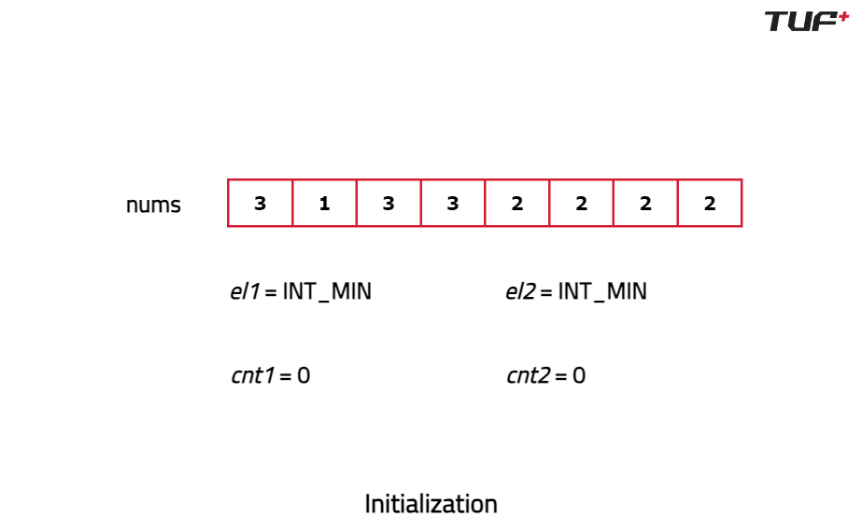
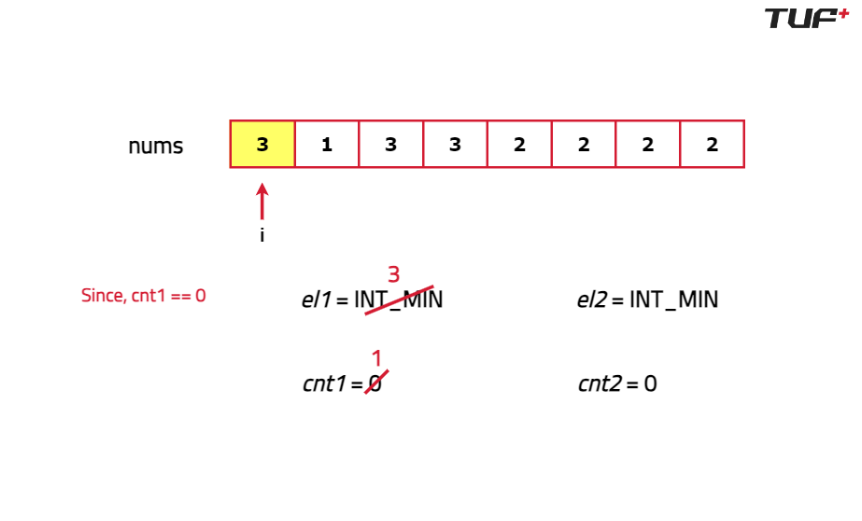
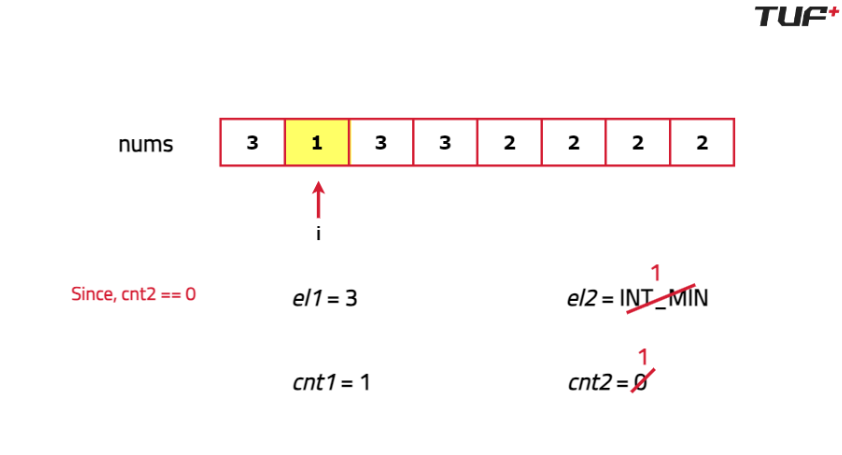
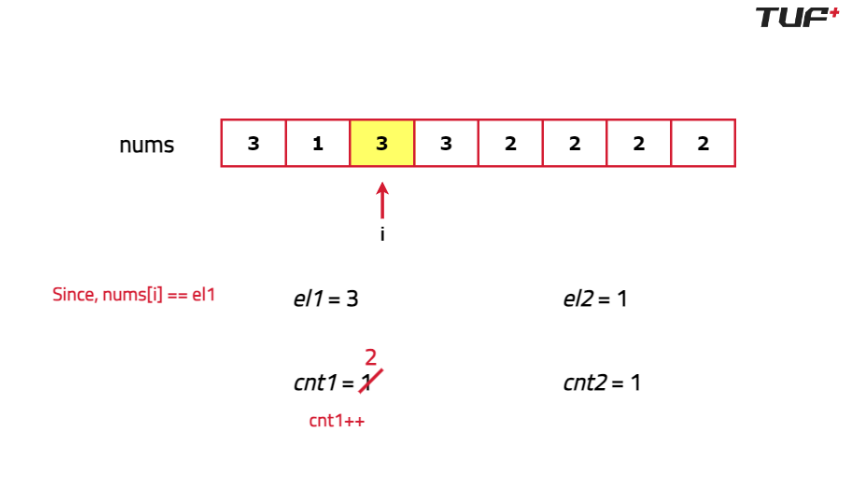
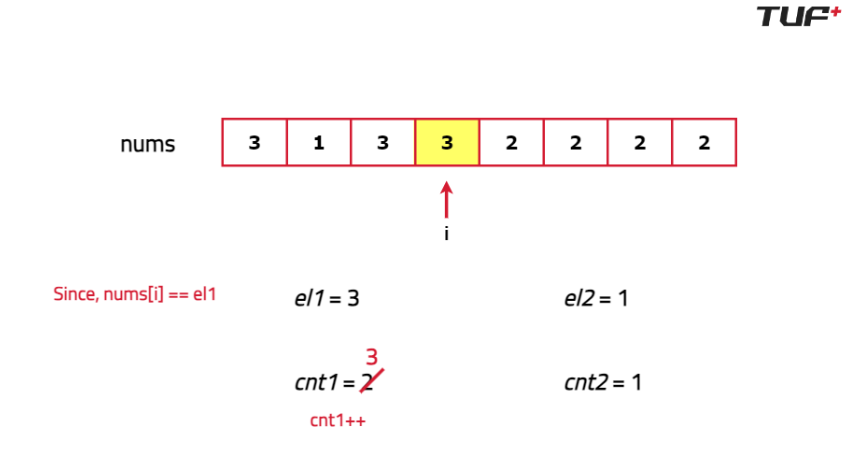
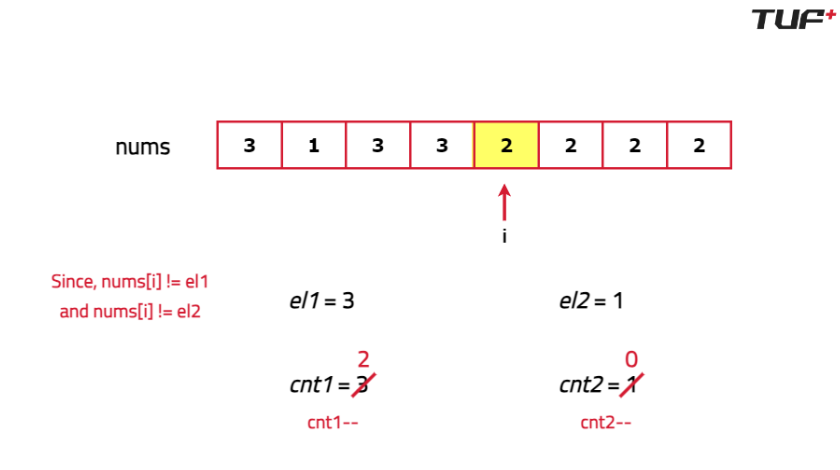
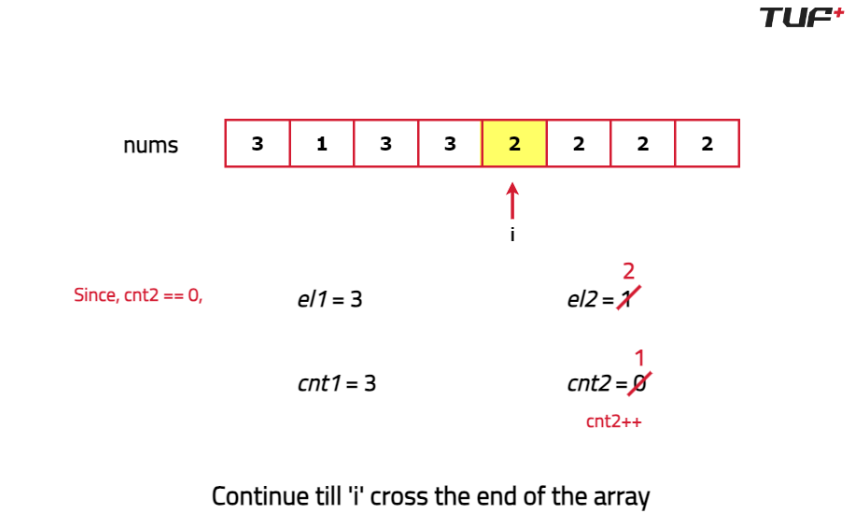
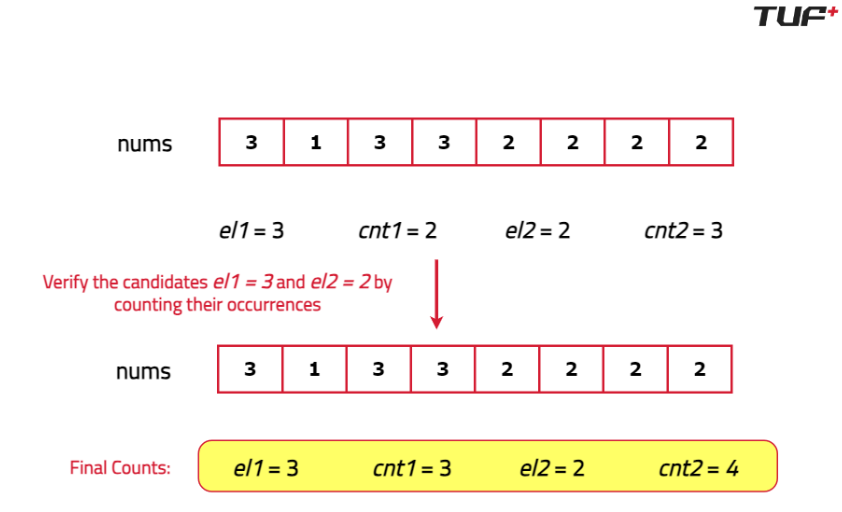
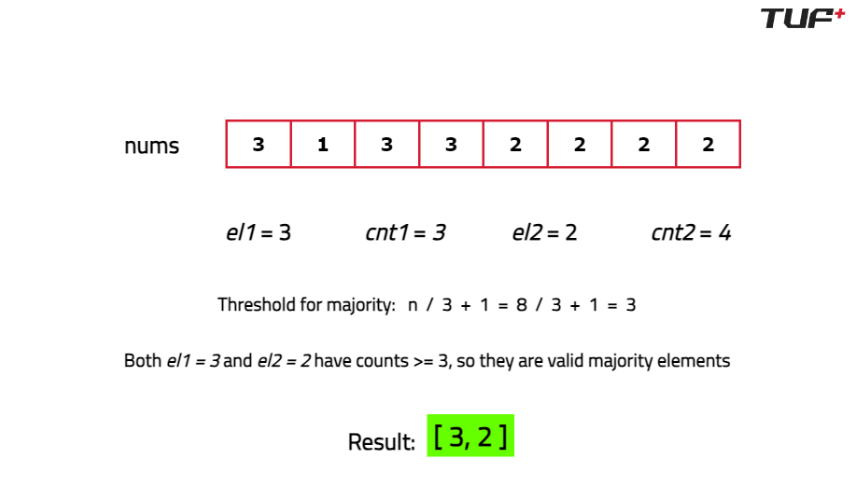

## Optimal Python Solution

In [5]:
from typing import List

class Solution:
    # Function to find majority elements in an array
    def majorityElementTwo(self, nums: List[int]) -> List[int]:
        
        # Size of the array
        n = len(nums)

        # Counts for elements el1 and el2
        cnt1, cnt2 = 0, 0
        
        """Initialize Element 1 and 
        Element 2 with INT_MIN value"""
        el1, el2 = float('-inf'), float('-inf')

        """Find the potential candidates using
        Boyer Moore's Voting Algorithm"""
        for num in nums:
            if cnt1 == 0 and el2 != num:
                cnt1 = 1
                # Initialize el1 as num
                el1 = num 
            elif cnt2 == 0 and el1 != num:
                cnt2 = 1
                # Initialize el2 as num
                el2 = num 
            elif num == el1:
                # Increment count for el1
                cnt1 += 1
            elif num == el2:
                # Increment count for el2
                cnt2 += 1 
            else:
                # Decrement count for el1
                cnt1 -= 1 
                 # Decrement count for el2
                cnt2 -= 1

        #Validate the candidates by counting occurrences in nums
        #Reset counts for el1 and el2
        cnt1, cnt2 = 0, 0 
        
        for num in nums:
            if num == el1:
                # Count occurrences of el1
                cnt1 += 1 
            if num == el2:
                 # Count occurrences of el2
                cnt2 += 1

        """ Determine the minimum count
        required for a majority element"""
        mini = n // 3 + 1
        
        # List of answers
        result = []

        """Add elements to the result list
        if they appear more than n/3 times"""
        if cnt1 >= mini:
            result.append(el1)
            
        if cnt2 >= mini and el1 != el2:
            # Avoid adding duplicate if el1 == el2
            result.append(el2)

        # Uncomment the following line if you want to sort the answer list
        # result.sort() # TC --> O(2*log2) ~ O(1);

        #return the majority elements
        return result

In [6]:
if __name__ == "__main__":
    arr = [11, 33, 33, 11, 33, 11]
    
    # Create an instance of Solution class
    sol = Solution()
  
    ans = sol.majorityElementTwo(arr)
    
    # Print the majority elements found
    print("The majority elements are:", *ans)

The majority elements are: 11 33


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N) + O(N), where N is size of the given array. The first O(N) is to calculate the counts and find the expected majority elements. The second one is to check if the calculated elements are the majority ones or not.
```

**Space Complexity:**
```
The Space Complexity will be O(1) for only using a list that stores a maximum of 2 elements. The space used is so small that it can be considered constant.
```

## FAQs & Interview Follow-ups :

**Why can there be at most two elements appearing more than n/3 times?**
```
If there were 3 elements appearing more than n/3 times, their total count would exceed n, which is impossible.
```

**Why is sorting less efficient?**
```
Sorting takes O(n * log n), which is slower than O(n) Boyer-Moore Majority Vote Algorithm.
```

**How would you modify this for elements appearing more than n/k times?**
```
To find elements that appear more than n/k times in an array, modify the Boyer-Moore Voting Algorithm to track k - 1 candidates instead of just 2.
```

# 3. 3-Sum Problem :

## Problem Statement :

Given an integer array nums. Return all triplets such that:

```
i != j, i != k, and j != k

nums[i] + nums[j] + nums[k] == 0.
```

Notice that the solution set must not contain duplicate triplets. One element can be a part of multiple triplets. The output and the triplets can be returned in any order.


### Examples :

**Example 1:**
```
Input: nums = [2, -2, 0, 3, -3, 5]
Output: [[-2, 0, 2], [-3, -2, 5], [-3, 0, 3]]

Explanation:

nums[1] + nums[2] + nums[0] = 0
nums[4] + nums[1] + nums[5] = 0
nums[4] + nums[2] + nums[3] = 0
```

**Example 2:**
```
Input: nums = [2, -1, -1, 3, -1]
Output: [[-1, -1, 2]]

Explanation:

nums[1] + nums[2] + nums[0] = 0

Note that we have used two -1s as they are separate elements with different indexes. But we have not used the -1 at index 4 as that would create a duplicate triplet.
```

```
Constraints:
1 <= nums.length <= 3000
-10^4 <= nums[i] <= 10^4
```

# Brute Force Solution

### Intuition

The most naive idea is to check all possible triplets using 3 loops and among them, consider the ones whose sum is equal to the given target 0.

Before taking them as the answer, sort the triplets in ascending order so as to consider only the unique triplets.

### Approach

* Declare a set to store unique triplets that sum up to zero.
  
* Use three nested loops to consider every possible triplet in the array :

```
Outer loop i runs from 0 to n-3.
Middle loop j runs from i+1 to n-2.
Inner loop k runs from j+1 to n-1.
```

* For each triplet (nums[i], nums[j], nums[k]), check if their sum equals zero.
* If yes, sort the triplet to maintain a consistent order and insert it into the set to avoid duplicates.
* After processing all triplets, convert the set into a vector and return it as the final result.

## Brute Force Python Solution

In [7]:
from typing import List

class Solution:
    #Function to find triplets having sum equals to target
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        # Set to store unique triplets
        triplet_set = set()

        n = len(nums)

        # Check all possible triplets
        for i in range(n - 2):
            for j in range(i + 1, n - 1):
                for k in range(j + 1, n):
                    if nums[i] + nums[j] + nums[k] == 0:
                        # Found a triplet that sums up to target
                        temp = [nums[i], nums[j], nums[k]]
                        
                        """ Sort the triplet to ensure 
                        uniqueness when storing in set"""
                        temp.sort()
                        triplet_set.add(tuple(temp))
        
        # Convert set to list of lists (unique triplets)
        ans = [list(triplet) for triplet in triplet_set]

        #Return the ans
        return ans

In [8]:
if __name__ == "__main__":
    nums = [-1, 0, 1, 2, -1, -4]

    # Create an instance of Solution class
    sol = Solution()


    ans = sol.threeSum(nums)

    # Print the result
    for triplet in ans:
        print(f"[{', '.join(map(str, triplet))}]")

[-1, 0, 1]
[-1, -1, 2]


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^3$ x log(no. of unique triplets)), where N is size of the array. Using 3 nested loops & inserting triplets into the set takes O(log(no. of unique triplets)) time complexity. But we are not considering the time complexity of sorting as we are just sorting 3 elements every time.

**Space Complexity:**

The Space Complexity will be O(2 x no. of the unique triplets) for using a set data structure and a list to store the triplets.

# Better Solution

### Intuition

The better approach uses simple mathematics where some calculative parameter is taken in RHS(right hand side) to compute the result.

For example if a + b + c = 0, then a + b = -c. Similar idea is used here.

### Approach

* Declare a set data structure to store unique triplets. Then iterate in the array lets call the variable i from index 0 to n -1. Inside it, there will be the second loop(say j) that will run from i+1 to n-1.
* Declare another HashSet to store the array elements as we intend to search for the third element using this HashSet.
* Inside the nested loop, calculate the value of the third element i.e. -(arr[i]+arr[j]).
* If the third element exists in the HashSet, sort these 3 values i.e. arr[i], arr[j], and the third element, and insert it in the set data structure declared in step 1.
* After that, insert the j-th element i.e. arr[j] in the HashSet as we only want to insert those array elements that are in between indices i and j. Finally, return a list of triplets stored in the set data structure.

## Better Python Solution

In [ ]:
from typing import List

class Solution:
    # Function to find triplets having sum equals to 0
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        # Set to store unique triplets
        triplet_set = set()

        n = len(nums)

        # Check all possible triplets
        for i in range(n):
            # Set to store elements seen so far in the loop
            hashset = set()

            for j in range(i + 1, n):
                # Calculate the 3rd element needed to reach target
                third =  - (nums[i] + nums[j])

                """ Find if third element exists in
                 hashset (complements seen so far)"""
                if third in hashset:
                    # Found a triplet that sums up to target
                    temp = [nums[i], nums[j], third]

                    """ Sort the triplet to ensure
                    uniqueness when storing in set"""
                    temp.sort()
                    triplet_set.add(tuple(temp))

                """ Insert the current element 
                into hashset for future checks"""
                hashset.add(nums[j])

        # Convert set to list of lists (unique triplets)
        ans = [list(triplet) for triplet in triplet_set]

        #Return the ans
        return ans

In [ ]:
if __name__ == "__main__":
    nums = [-1, 0, 1, 2, -1, -4]

    # Create an instance of Solution class
    sol = Solution()

    ans = sol.threeSum(nums)

    # Print the result
    for triplet in ans:
        print(f"[{', '.join(map(str, triplet))}]")

## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$ x log(no. of unique triplets)), where N is size of the array. Inserting triplets into the set takes O(log(no. of unique triplets)) time complexity. However, we are not considering the time complexity of sorting, as we are only sorting 3 elements each time.

<b>Note: For Java (HashSet), insertion operation takes O(1) time. Thus, the overall time complexity for Java code will be O($N^2$).</b>

**Space Complexity:**

The Space Complexity will be O(2 x no. of the unique triplets) + O(N) for using a set data structure and a list to store the triplets and extra O(N) for storing the array elements in another set.

# Optimal Solution

### Intuition

Imagine you're organizing a dinner party and you want to create a balanced meal with three different ingredients that together have zero net calories.

First task would be to list all your ingredients by their calorie values and sort them. Then, for each ingredient, try to find two other ingredients from the remaining list that, when combined, balance the calories back to zero.

Start with one ingredient and use two pointers, one starting from the left (beginning of the list) and the other from the right (end of the list). By adjusting these pointers, check if the three chosen ingredients balance to zero calories. If they do, you have a balanced meal! Continue this process, ensuring that the same combination of ingredients more than once is not picked.

### Approach

* Sort the entire array & iterate from 0 to n-1 in the array - let us call the loop variable i. In each iteration, this value will be fixed for all different values of the rest of the 2 pointers.
* Inside the loop, first check if the current and the previous element is the same and if it is, do nothing and continue to the next value of i.
* After that, there will be 2 moving pointers i.e. j(starts from i+1) and k(starts from the last index). The pointer j will move forward and the pointer k will move backward until they cross each other while the value of i will be fixed.
* Now check the sum of arr[i] and arr[j] and arr[k]. If the sum is exceeding target, then the ask is to use lesser valued elements and so decrease the value of k(i.e. k--). If the sum is lesser than the target, we need a bigger value and so increase the value of j (i.e. j++).
* If the sum is equal to the target, simply insert the triplet i.e. arr[i], arr[j], arr[k] into answer data structure and move the pointers j and k skipping the duplicate elements (i.e. by checking the adjacent elements while moving the pointers). Finally, return the list of unique triplets.

## Dry Run

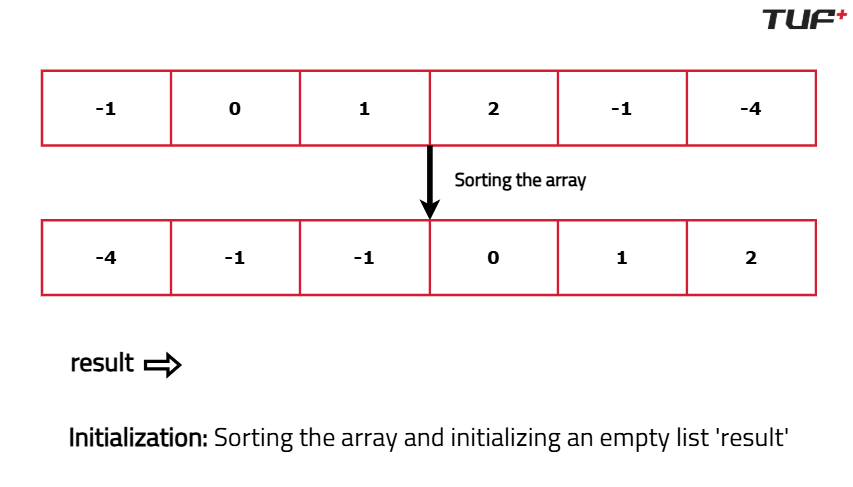
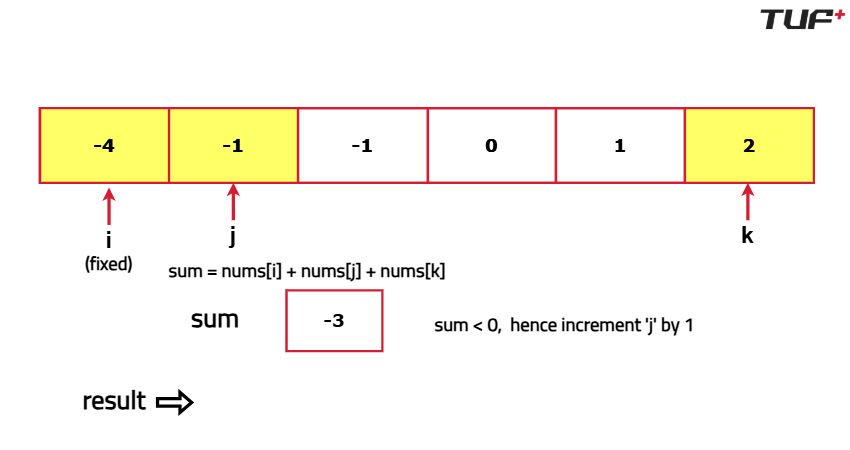
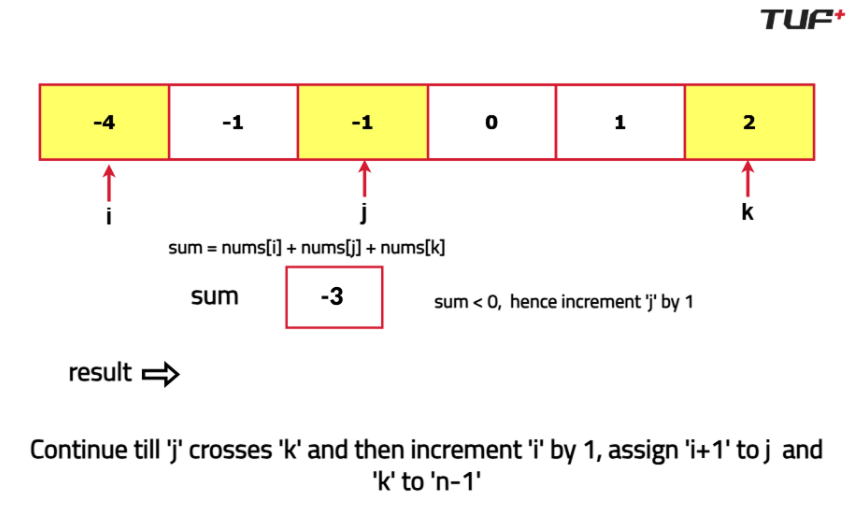
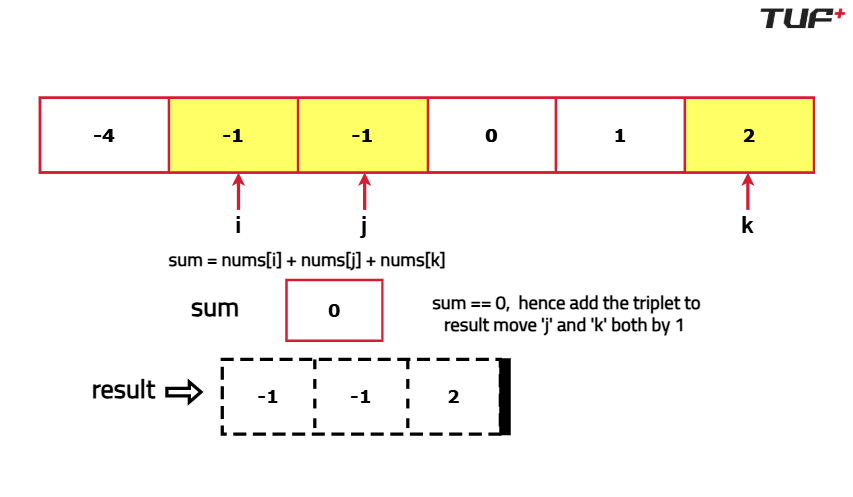
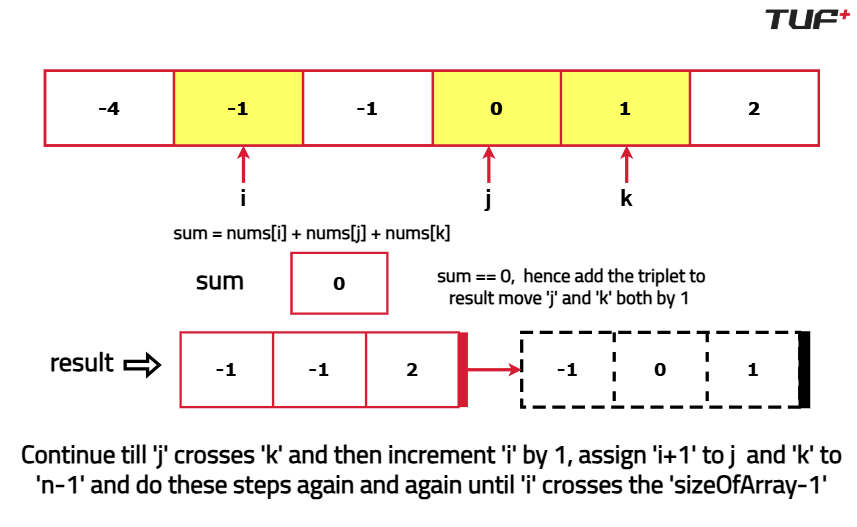
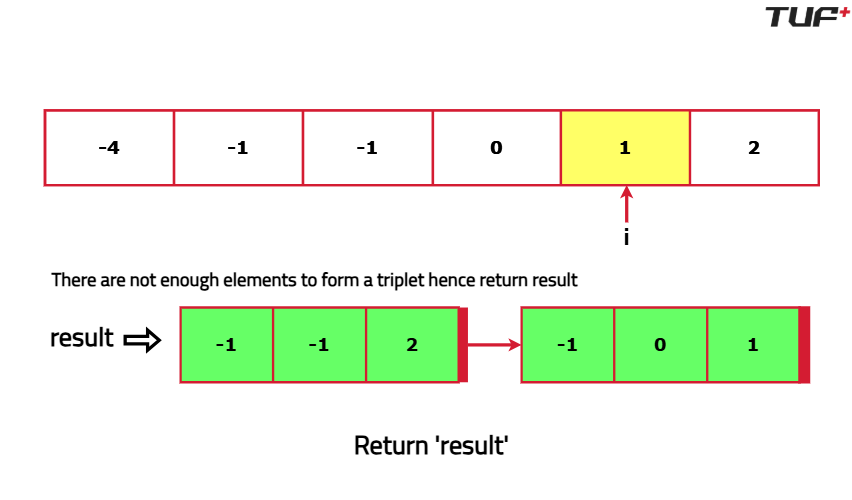

## Optimal Python Solution

In [9]:
from typing import List

class Solution:
    # Function to find triplets having sum equals to target
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        
        # List to store the triplets that sum up to target
        ans = []
        
        n = len(nums)
        
        # Sort the input array nums
        nums.sort()
        
        # Iterate through the array to find triplets
        for i in range(n):
            # Skip duplicates
            if i > 0 and nums[i] == nums[i - 1]:
                continue
            
            # Two pointers approach
            j = i + 1
            k = n - 1
            
            while j < k:
                sum_val = nums[i] + nums[j] + nums[k]
                
                if sum_val < 0:
                    j += 1
                elif sum_val > 0:
                    k -= 1
                else:
                    # Found a triplet that sums up to target
                    temp = [nums[i], nums[j], nums[k]]
                    ans.append(temp)
                    
                    # Skip duplicates
                    j += 1
                    k -= 1
                    while j < k and nums[j] == nums[j - 1]:
                        j += 1
                    while j < k and nums[k] == nums[k + 1]:
                        k -= 1
        
        return ans

In [10]:
if __name__ == "__main__":
    nums = [-1, 0, 1, 2, -1, -4]
    
    # Create an instance of Solution class
    sol = Solution()

    ans = sol.threeSum(nums)
    
    # Print the result
    for triplet in ans:
        print(f"[{', '.join(map(str, triplet))}]")

[-1, -1, 2]
[-1, 0, 1]


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O(NlogN) + O($N^2$), where N is size of the array. This is because the pointer i, is running for approximately N times. Also both the pointers j and k combined can run for approximately N times including the operation of skipping duplicates. So the total time complexity will be O($N^2$).

**Space Complexity:**

The Space Complexity will be O(1) as no extra space is used.

## FAQs & Interview Follow-ups :

**How do we avoid duplicate triplets?**
```
Skip duplicate values of nums[i] while iterating. Skip duplicate values of nums[left] and nums[right] during the two-pointer traversal.
```

**Why sort the array?**
```
Sorting allows: Efficient identification of duplicates by comparing adjacent elements. Simplification of the two-pointer logic, as the relationship between pointer movements and the sum becomes predictable.
```

**What if the input array is unsorted?**
```
Sorting is part of the solution and is necessary for efficient implementation. It adds O(nlogn) complexity, which is negligible compared to the O(n2) time required for finding triplets.
```

**How would you modify the algorithm to find all unique triplets with a sum equal to a different target?**
```
Instead of finding triplets that sum to 0: Look for triplets that sum to a given target t. Use the same two-pointer approach, with nums[left]+nums[right]=t−nums[i].
```

# 4. 4-Sum Problem :

## Problem Statement :

Given an integer array nums and an integer target. Return all quadruplets [nums[a], nums[b], nums[c], nums[d]] such that:

```
a, b, c, d are all distinct valid indices of nums.
nums[a] + nums[b] + nums[c] + nums[d] == target.
```

Notice that the solution set must not contain duplicate quadruplets. One element can be a part of multiple quadruplets. The output and the quadruplets can be returned in any order.


### Examples :

**Example 1:**
```
Input: nums = [1, -2, 3, 5, 7, 9], target = 7
Output: [[-2, 1, 3, 5]]

Explanation:
nums[1] + nums[0] + nums[2] + nums[3] = 7.
```

**Example 2:**
```
Input: nums = [7, -7, 1, 2, 14, 3], target = 9
Output: []

Explanation:
No quadruplets are present which add upto 9.
```

```
Constraints:
1 <= nums.length <= 200
-10^4 <= nums[i] <= 10^4
-10^4 <= target <= 10^4
```

# Brute Force Solution

### Intuition

The idea is to check all possible quadruplets and among them, consider the ones whose sum is equal to the given target. And before considering them as our answer, sort the quadruplets in ascending order.

### Approach

* For getting quadruplets, 4 nested loops will be used.
* The first loop (say i) will run from 0 to n-1. Inside which, there will be the second loop (say j) that will run from i+1 to n-1. The third loop (say k) that runs from j+1 to n-1. Inside loop k, the fourth loop (say l) will run from k+1 to n-1, yielding 4 elements from array for considering a quadruplet.
* Now, inside these four nested loops, check the sum of arr[i], arr[j], arr[k] and arr[l], and if it is equal to the target, sort this quadruplet and insert it in the set data structure declared to store ans. Finally, return a list of stored quadruplets.

## Brute Force Python Solution

In [11]:
from typing import List

class Solution:
    #function to find quadruplets having sum equal to target
    def fourSum(self, nums: List[int], target: int) -> List[List[int]]:
        #size of array
        n = len(nums)
        
        #Set to store unique quadruplets
        ans = set()
        
        # Checking all possible quadruplets
        for i in range(n):
            for j in range(i + 1, n):
                for k in range(j + 1, n):
                    for l in range(k + 1, n):
                        # Calculate the sum of the current quadruplet
                        sum_val = nums[i] + nums[j] + nums[k] + nums[l]
                        
                        # Check if the sum matches the target
                        if sum_val == target:
                            temp = [nums[i], nums[j], nums[k], nums[l]]
                            # Sort the quadruplet to ensure uniqueness
                            temp.sort()
                            ans.add(tuple(temp))
        
        return list(ans)

In [12]:
if __name__ == "__main__":
    nums = [4, 3, 3, 4, 4, 2, 1, 2, 1, 1]
    target = 9
    
    #Create an instance of Solution class
    sol = Solution()
    
    ans = sol.fourSum(nums, target)
    
    # Print the result
    print("The quadruplets are: ")
    for quad in ans:
        print(f"[{', '.join(map(str, quad))}]")

The quadruplets are: 
[1, 2, 2, 4]
[1, 2, 3, 3]
[1, 1, 3, 4]


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^4$) for using 4 nested loops, where N is size of the array.

**Space Complexity:**

The Space Complexity will be O(2 x no. of the quadruplets), for using a set data structure and a list to store the quads.

# Better Solution

### Intuition

The better approach uses simple mathematics where some calculative parameter is taken in RHS (right hand side) to compute the result.

For example if a + b + c + d = 0, then a + b + c = -d. Similar idea is used here.

### Approach

* Iterate in the array from 0 to n-1 where n is the length of the array. Inside this loop, there will be the second loop (say j) that will run from i+1 to n-1. Then using a 3rd nested loop(say k) that runs from j+1 to n-1 try to calculate the value of the fourth element i.e. target - (nums[i] + nums[j] + nums[k]).
* Declare a HashSet to store the specific array elements as we intend to search the fourth element in that HashSet.
* If the fourth element exists in the HashSet, sort these four values i.e. nums[i], nums[j], nums[k], and the fourth element, and insert it in the set data structure declared to store ans.
* After that, insert the k-th element i.e. nums[k] in the HashSet as we only want to insert those array elements that are in between indices j and k. Finally, return a list of stored quadruplets stored in the set data structure.

## Better Python Solution

In [13]:
from typing import List

class Solution:
    def fourSum(self, nums: List[int], target: int) -> List[List[int]]:
        ans = []
        n = len(nums)
        
        # Set to store unique quadruplets
        st = set()
        
        # Checking all possible quadruplets
        for i in range(n):
            for j in range(i + 1, n):
                # Set to store elements seen so far in the loop
                hashset = set()
                
                for k in range(j + 1, n):
                    # Calculate the fourth element needed to reach target
                    summ = nums[i] + nums[j] + nums[k]
                    fourth = target - summ
                    
                    """ Find if fourth element exists in
                    hashset (complements seen so far)"""
                    if fourth in hashset:
                        
                        # Found a quadruplet that sums up to target
                        temp = sorted([nums[i], nums[j], nums[k], fourth])
                        st.add(tuple(temp))
                    
                    # Insert the kth element into hashset for future checks
                    hashset.add(nums[k])
        
        # Convert set to list (unique quadruplets)
        ans = [list(t) for t in st]
        return ans

In [14]:
if __name__ == "__main__":
    nums = [4, 3, 3, 4, 4, 2, 1, 2, 1, 1]
    target = 9
    
    # Create an instance of Solution class
    sol = Solution()
    
    ans = sol.fourSum(nums, target)
    
    # Print the result
    print("The quadruplets are:")
    for quad in ans:
        print(quad)

The quadruplets are:
[1, 2, 2, 4]
[1, 2, 3, 3]
[1, 1, 3, 4]


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^3$xlog(M)), for using 3 nested loops and inside the loops there are some operations on the set data structure which take log(M) time complexity, where N is size of the array, M is number of elements in the set.

**Space Complexity:**

The Space Complexity will be O(2 x no. of the quadruplets) + O(N) for using a set data structure and a list to store the quads. This results in the first term. Then the second space is taken by the set data structure that we are using to store the array elements. At most, the set can contain approximately all the array elements and so the space complexity is O(N).

# Optimal Solution

### Intuition

The optimal approach is based on similar idea from 2-Sum and 3-Sum problem, which is sorting the entire array in the first step and to get the unique quads and using pointers to keep getting unique quads.

### Approach

* Sort the entire array and iterate from 0 to n-1 in the array where n is length of the array, and let us call the loop variable i. In each iteration, i will be fixed for all different values of the rest of the 3 pointers. Inside the loop, first check if the current and the previous element is the same and if it is, do nothing and continue to the next value of i.
* After the first check inside the loop, introduce another fixed pointer j (runs from i+1 to n-1). Again check for duplicate elements and only perform any further operation if the elements are different.
* Now, there will be 2 moving pointers i.e. k (starts from j+1) and l (starts from the last index). The pointer k will move forward and the pointer l will move backward in the array until they cross each other while the value of i and j will be fixed.
* Check the sum i.e. nums[i] + nums[j] + nums[k] + nums[l], if the sum is greater, then the idea is to minimize the sum, hence we need lesser elements and so decrease the value of l and if the sum is lesser than the target, we need a bigger value and so we will increase the value of k.
* If the sum is equal to the target, simply insert the quad i.e. nums[i], nums[j], nums[k], and nums[l] into answer and move the pointers k and l skipping the duplicate elements (i.e. by checking the adjacent elements while moving the pointers). Finally, return the list of unique quadruplets.

## Dry Run

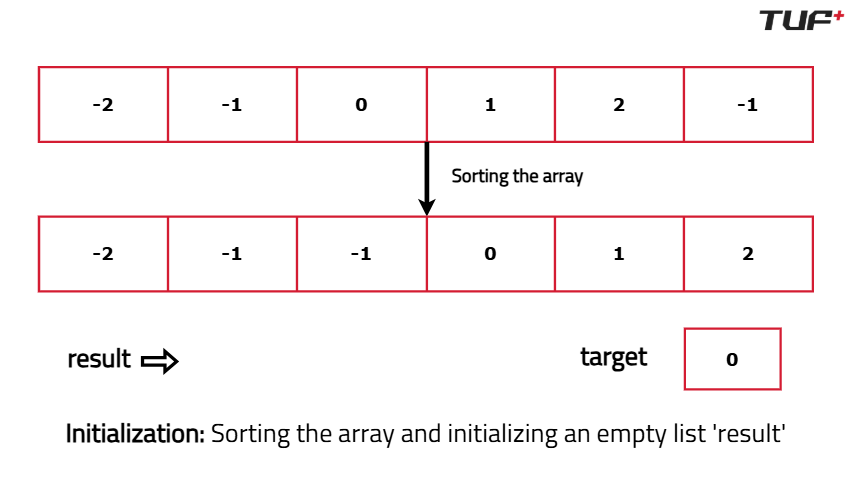
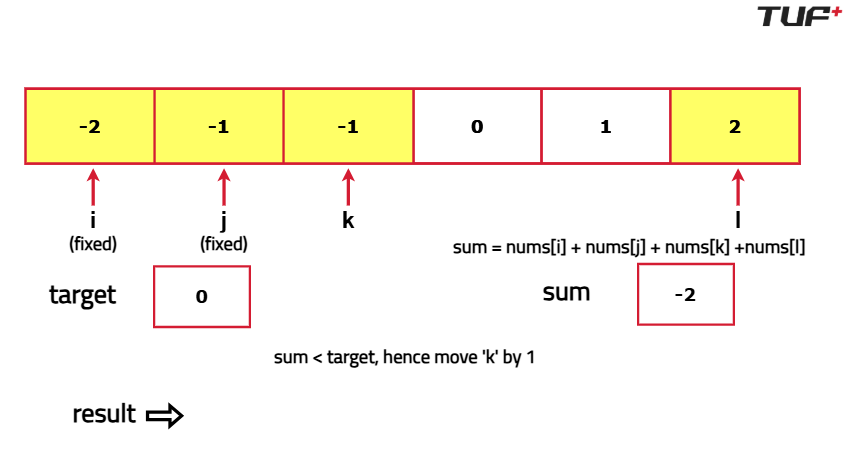
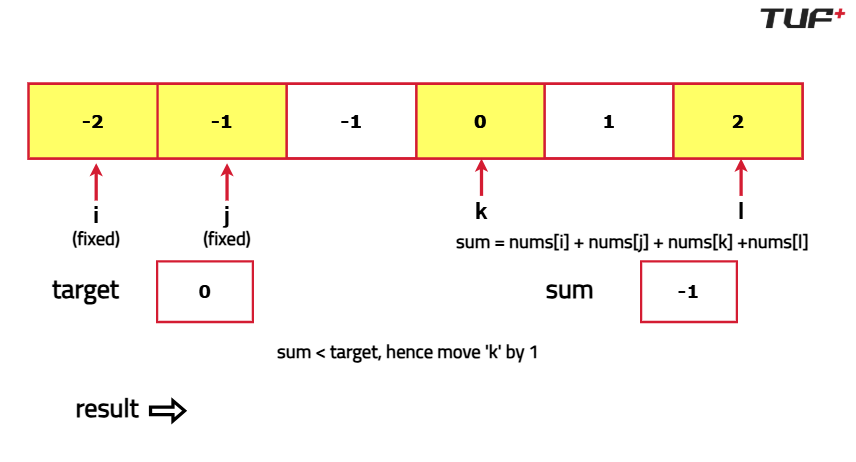
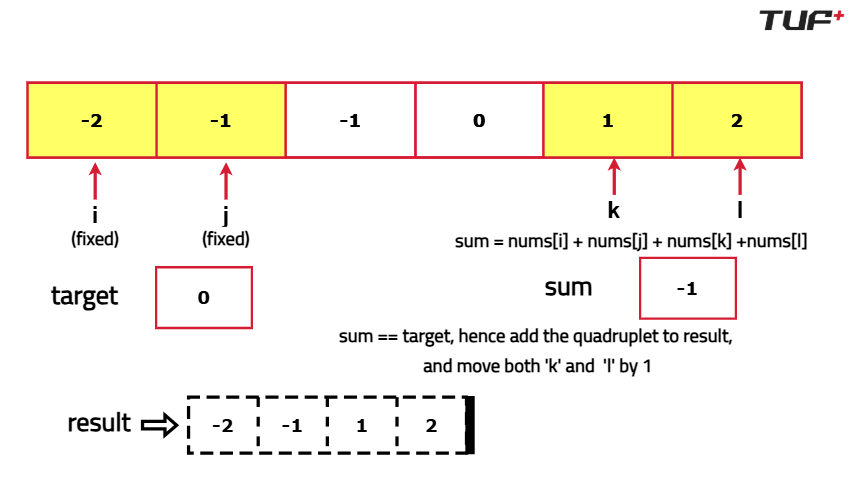
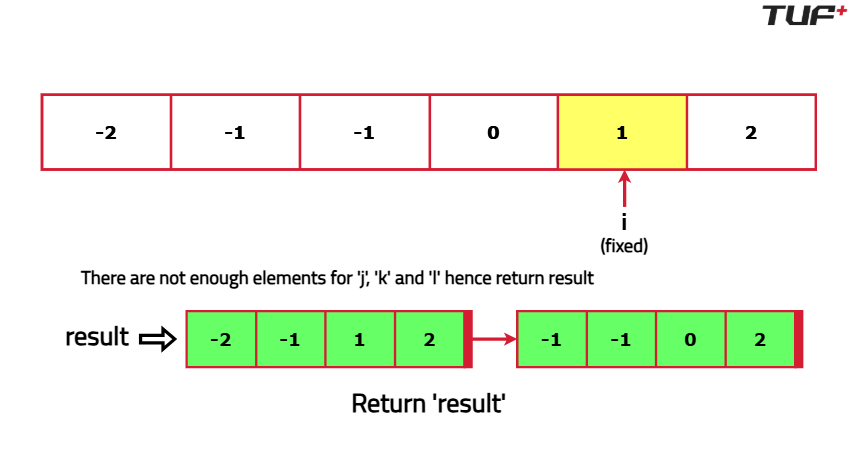

## Optimal Python Solution

In [ ]:
from typing import List

class Solution:
    def fourSum(self, nums: List[int], target: int) -> List[List[int]]:
        ans = []
        n = len(nums)
        
        # Sort the input array nums
        nums.sort()
        
        # Iterate through the array to find quadruplets
        for i in range(n):
            # Skip duplicates for i
            if i > 0 and nums[i] == nums[i - 1]:
                continue
            
            for j in range(i + 1, n):
                # Skip duplicates for j
                if j > i + 1 and nums[j] == nums[j - 1]:
                    continue
                
                # Two pointers approach
                k = j + 1
                l = n - 1
                
                while k < l:
                    sum_val = nums[i] + nums[j] + nums[k] + nums[l]
                    
                    if sum_val == target:
                        # Found a quadruplet that sums up to target
                        temp = [nums[i], nums[j], nums[k], nums[l]]
                        ans.append(temp)
                        
                        # Skip duplicates for k and l
                        k += 1
                        l -= 1
                        while k < l and nums[k] == nums[k - 1]:
                            k += 1
                        while k < l and nums[l] == nums[l + 1]:
                            l -= 1
                    elif sum_val < target:
                        k += 1
                    else:
                        l -= 1
        
        return ans

In [ ]:
if __name__ == "__main__":
    nums = [4, 3, 3, 4, 4, 2, 1, 2, 1, 1]
    target = 9
    
    # Create an instance of Solution class
    sol = Solution()

    ans = sol.fourSum(nums, target)
    
    # Print the result
    print("The quadruplets are: ")
    for quad in ans:
        print(quad)

## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^3$), where N is the size of the given array.
Sorting the array takes O(N*logN) time, and the 3 nested loops take O($N^3$) time. Thus, the overall time complexity is O($N^3$) + O(N*logN), which boils down to O($N^3$).

**Space Complexity:**

The Space Complexity will be O(no. of quadruplets), this space is only used to store the answer. No extra space is used to solve this problem. So, from that perspective, space complexity can be written as O(1).

# 5. Largest Subarray with 0 Sum :

## Problem Statement :

You are given an integer array arr of size n which contains both positive and negative integers. Your task is to find the length of the longest contiguous subarray with sum equal to 0.

Return the length of such a subarray. If no such subarray exists, return 0.


### Examples :

**Example 1:**
```
Input: arr = [15, -2, 2, -8, 1, 7, 10, 23]
Output: 5

Explanation:
The subarray [-2, 2, -8, 1, 7] sums up to 0 and has the maximum length among all such subarrays.
```

**Example 2:**
```
Input: arr = [2, 10, 4]
Output: 0

Explanation:
There is no subarray whose elements sum to 0.
```

```
Constraints:
1 <= arr.length <= 10^6
-10^3 <= arr[i] <= 10^3 for each valid index i
```

# Brute Force Solution

### Intuition

The brute force approach is based on checking all possible subarrays of the given array, computing their sum, and checking if the sum is zero. If the sum is zero, we keep track of the length of that subarray and update the longest length whenever we find a new valid subarray.

This approach is straightforward, but it’s inefficient for large arrays, as it involves iterating through all subarrays and computing their sums.

### Approach

* Loop over all possible starting points for the subarrays.
* For each starting point, loop over all possible end points.
* For each subarray, compute the sum and check if it’s zero.
* If the sum is zero, update the maximum length of such subarrays.

## Dry Run

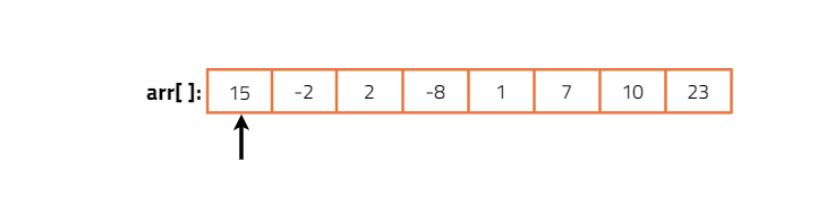
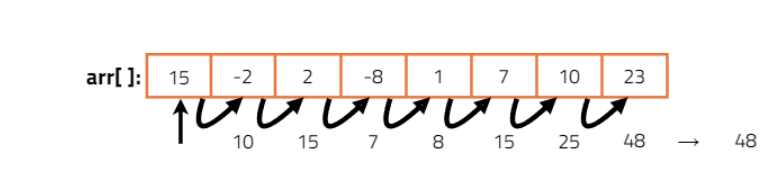
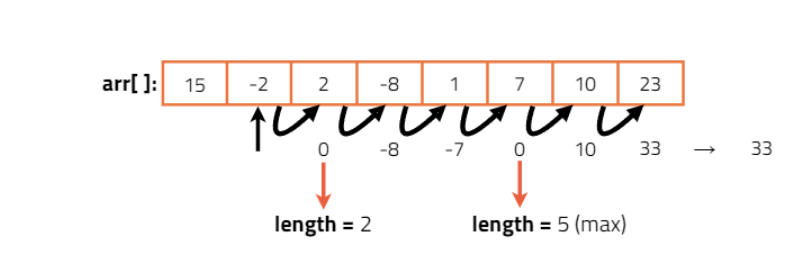
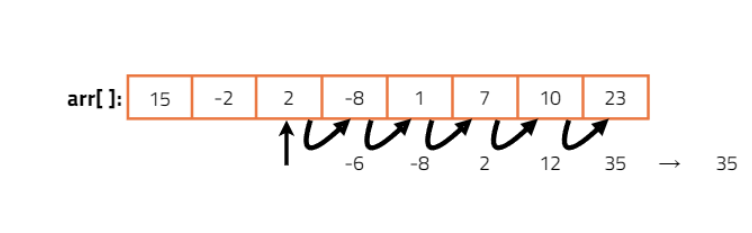
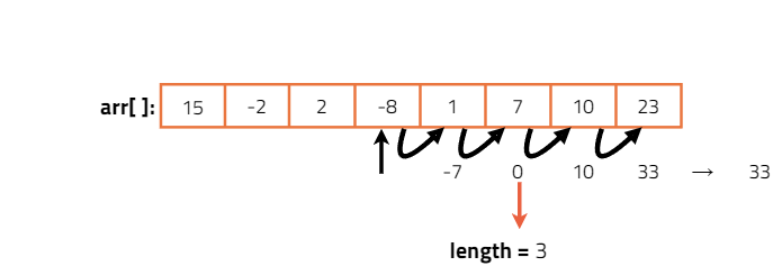
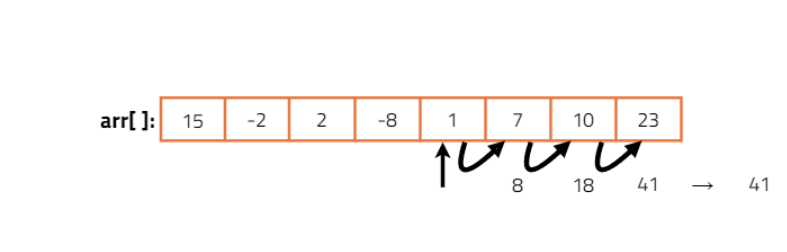
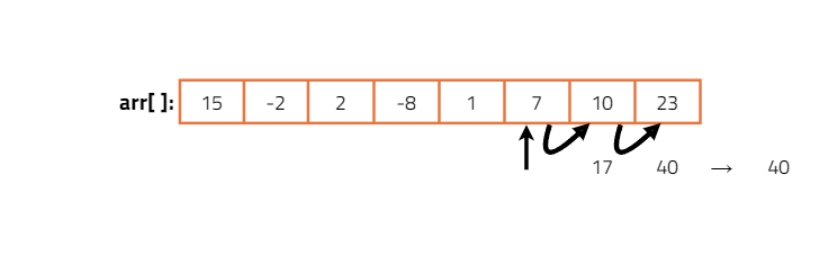
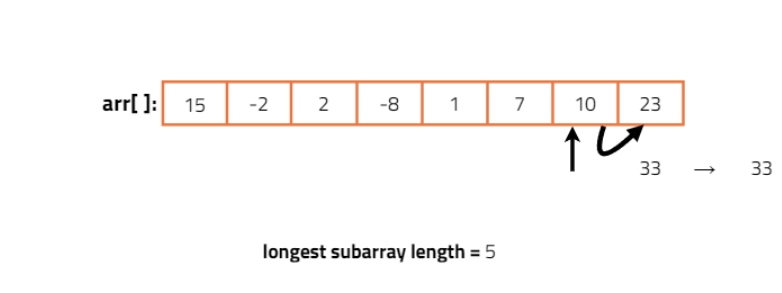

## Brute Force Python Solution

In [15]:
class Solution:
    # Method to find the maximum length subarray with sum zero
    def maxLen(self, arr):
        n = len(arr)
        maxLength = 0

        # Loop over all subarrays
        for start in range(n):
            sum = 0
            for end in range(start, n):
                sum += arr[end]  # Compute the sum of the subarray

                # Check if the sum is zero
                if sum == 0:
                    maxLength = max(maxLength, end - start + 1)  # Update max length if needed

        return maxLength  # Return the maximum length of subarray with sum zero

In [16]:
# Test the Solution class
sol = Solution()  # Create an object of the Solution class

# Example input: list of integers
arr = [1, -1, 3, 2, -2, 4, -4]

# Get the maximum length of subarray with sum zero
result = sol.maxLen(arr)

# Output the result
print(f"The maximum length of subarray with sum zero is: {result}")

The maximum length of subarray with sum zero is: 4


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$), since we are using 2 nested loops to go through all the subarrays and compute each subarray sum.

**Space Complexity:**

The Space Complexity will be O(1), since only a few variables are used for tracking the sum and maximum length.

# Optimal Solution

### Intuition

The Brute Force approach checks all subarrays and computes their sums explicitly, leading to inefficient time complexity. We can optimize this by using a hash map (unordered_map) to store the cumulative sum of elements as we iterate through the array.

The idea is based on the fact that if the cumulative sum up to index i is the same as the cumulative sum up to index j, then the sum of the subarray from i + 1 to j must be zero. By storing the first occurrence of each cumulative sum in a hash map, we can efficiently track the length of the subarray with sum equal to zero.

### Approach

* Initialize a hash map to store the first occurrence of each cumulative sum.
* Iterate over the array, maintaining a running cumulative sum.
* If the cumulative sum is zero, the subarray from the start to the current index has a sum of zero.
* If the cumulative sum has been seen before at some earlier index, the subarray between these indices has a sum of zero.
* Keep track of the longest such subarray.

## Optimal Python Solution

In [17]:
class Solution:
    # Method to find the maximum length subarray with sum zero using prefix sum and hash map
    def maxLen(self, arr):
        sumMap = {}  # Map to store first occurrence of cumulative sum
        maxLength = 0
        sum = 0

        # Traverse the array
        for i in range(len(arr)):
            sum += arr[i]  # Compute the running sum

            # If sum is zero, the subarray from index 0 to i has sum 0
            if sum == 0:
                maxLength = i + 1
            # If the sum has been seen before, update maxLength
            elif sum in sumMap:
                maxLength = max(maxLength, i - sumMap[sum])
            else:
                # Store the first occurrence of the cumulative sum
                sumMap[sum] = i

        return maxLength  # Return the maximum length of subarray with sum zero

In [18]:
# Test the Solution class
sol = Solution()  # Create an object of the Solution class

# Example input: list of integers
arr = [1, -1, 3, 2, -2, 4, -4]

# Get the maximum length of subarray with sum zero
result = sol.maxLen(arr)

# Output the result
print(f"The maximum length of subarray with sum zero is: {result}")

The maximum length of subarray with sum zero is: 4


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), since we only traverse the array once, and each operation with the hash map (insert and lookup) is O(1).
```

**Space Complexity:**
```
The Space Complexity will be O(N) for storing the cumulative sums and their first occurrences in the hash map.
```

## FAQs & Interview Follow-ups :

**Why does the same prefix sum occurring at two indices indicate a subarray sum of 0?**
```
Prefix sum at a position represents the total sum from the start up to that index. If the same sum appears again later, it means the sum of the elements between the two positions is zero. That’s because the total hasn’t changed despite adding more elements, which implies that the added portion must have had a net sum of 0.
```

**Does the solution work for arrays with all negative or all positive numbers?**
```
Yes, it works for any combination of integers. The technique of using prefix sums and checking for duplicates applies as long as the numbers are integers. However, in the special case where all numbers are positive (or all negative), a sum of 0 is impossible unless the array contains actual 0s.
```

**Can this approach be adapted to find the longest subarray with a target sum other than 0?**
```
Yes, the same technique applies. You would track prefixSum - target in the hash map instead of looking specifically for prefixSum == 0. The idea is to detect whether there exists a previous prefix sum that, if subtracted from the current one, gives the target. This makes the approach versatile for various sum-based subarray problems.
```

**How would we modify the algorithm to return the actual subarray instead of just its length?**
```
To return the subarray, you'd store the start and end indices when a longer zero-sum subarray is found. At the end, slice the original array from start + 1 to end using those stored indices. This builds directly on the same logic with only a minor addition in state tracking.
```

# 6. Count Number of Subarrays with given XOR K :

## Problem Statement :

Given an array of integers nums and an integer k, return the total number of subarrays whose XOR equals to k.


### Examples :

**Example 1:**
```
Input : nums = [4, 2, 2, 6, 4], k = 6
Output : 4

Explanation : The subarrays having XOR of their elements as 6 are [4, 2],  [4, 2, 2, 6, 4], [2, 2, 6], and [6]. Key takeaway: XOR is not doing powers or arithmetic—it’s just flipping bits. The reason [4, 2] gives 6 is because of their binary representation.
```

**Example 2:**
```
Input :nums = [5, 6, 7, 8, 9], k = 5
Output : 2

Explanation : The subarrays having XOR of their elements as 5 are [5] and [5, 6, 7, 8, 9].
```

```
Constraints:
1 <= nums.length <= 10^5
1 <= nums[i] <= 10^9
1 <= k <= 10^9
```

# Brute Force Solution

### Intuition

We will check the XOR of every possible subarray and count how many of them are equal to k. To do this, use three nested loops. The first two loops (let's call them i and j) will iterate over every possible starting and ending index of a subarray. In each iteration, the subarray range will be from index i to index j. Using another loop, calculate the XOR of the elements in the subarray [i...j]. Count the number of subarrays where the XOR is equal to k.

Note: Select every possible subarray using two nested loops, and for each subarray, calculate the XOR of all its elements using another loop.

### Approach

* First, run a loop (let's call it i) that selects every possible starting index of the subarray. The starting indices can range from index 0 to n−1 (where n is the size of the array). Inside this loop, run another loop (let's call it j) that signifies the ending index of the subarray. For each subarray starting from index i, the ending index can range from i to n−1.
* For each subarray from index i to j (i.e., arr[i...j]), run another loop to calculate the XOR of all the elements in that subarray.
* If the XOR equals k, increase the count by 1.

## Brute Force Python Solution

In [20]:
class Solution:
    # Function to count the number of subarrays with XOR k
    def subarraysWithXorK(self, nums, k):
        n = len(nums)
        cnt = 0

        # Step 1: Generate subarrays
        for i in range(n):
            for j in range(i, n):
                xorr = 0
                # Step 2: Calculate XOR of all elements in the subarray
                for K in range(i, j + 1):
                    xorr ^= nums[K]
                # Step 3: Check XOR and count
                if xorr == k:
                    cnt += 1
        return cnt

In [21]:
if __name__ == "__main__":
    a = [4, 2, 2, 6, 4]
    k = 6

    # Create an instance of the Solution class
    solution = Solution()

    # Function call to get the result
    ans = solution.subarraysWithXorK(a, k)
 
    print("The number of subarrays with XOR k is:", ans)

The number of subarrays with XOR k is: 4


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^3$), where N is the size of the array. This is because we are using three nested loops, each running approximately N times.

**Space Complexity:**

The Space Complexity will be O(1) since we are not using any additional space.

# Better Solution

### Intuition

If we carefully observe, we can notice that to get the XOR of the current subarray, we just need to XOR the current element (i.e., arr[j]) with the XOR of the previous subarray (i.e., arr[i...j-1]). Assume the previous subarray is arr[i...j-1] and the current subarray is arr[i...j]. The XOR of arr[i...j] can be calculated as (XOR of arr[i...j-1]) ^ arr[j]. This approach allows us to remove the third loop, and calculate the XOR while moving the j pointer.

### Approach

* First, run a loop (let's call it i) that selects every possible starting index of the subarray. The starting indices can range from index 0 to n−1 (where n is the size of the array). Inside this loop, run another loop (let's call it j) that signifies the ending index of the subarray. For each subarray starting from index i, the ending index can range from i to n−1.
* For each subarray from index i to j, calculate the XOR of all the elements in that subarray by simply doing XOR operation on the previous XOR and the element at j index.
* If the XOR equals k, increase the count by 1.

## Better Python Solution

In [22]:
class Solution:
    # Function to count the number of subarrays with XOR k
    def subarraysWithXorK(self, nums, k):
        n = len(nums)
        cnt = 0

        # Step 1: Generate subarrays
        for i in range(n):
            xorr = 0
            for j in range(i, n):
                # Step 2: Calculate XOR of all elements in the subarray
                xorr ^= nums[j]

                # Step 3: Check XOR and count
                if xorr == k:
                    cnt += 1
        return cnt

In [23]:
if __name__ == "__main__":
    a = [4, 2, 2, 6, 4]
    k = 6

    # Create an instance of the Solution class
    solution = Solution()

    # Function call to get the result
    ans = solution.subarraysWithXorK(a, k)
    
    print("The number of subarrays with XOR k is:", ans)

The number of subarrays with XOR k is: 4


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$), where N is the size of the array. Since we are using two nested loops, each running for N times, the time complexity will be approximately O($N^2$).

**Space Complexity:**

The Space Complexity will be O(1) as we are not using any additional space.

# Optimal Solution

### Intuition

In this approach, we try to utilize the concept of prefix XOR to solve this problem. The prefix XOR of a subarray ending at index 𝑖 is simply the XOR of all the elements from the start of the array up to index 𝑖.

### Observation

Assume the prefix XOR of a subarray ending at index i is xr. To find subarrays with XOR equal to k, we note that if a subarray has XOR k, then the prefix XOR of the remaining part will be xr XOR k (where XOR denotes the XOR operation). So, for a subarray ending at index i with prefix XOR xr, if we remove the part with prefix XOR xr XOR k, the remaining part will have XOR k. The below image will clarify this concept.

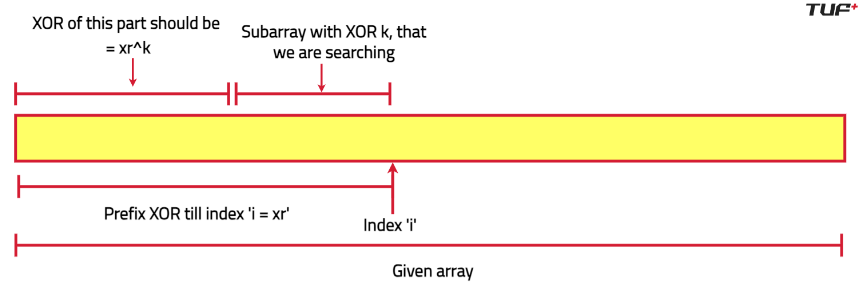
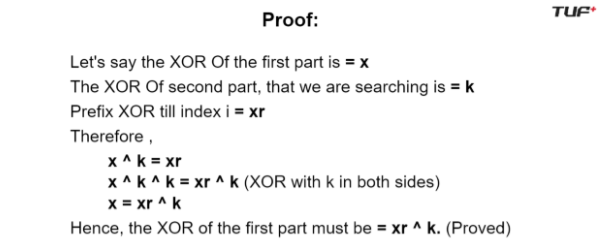

Instead of directly searching for subarrays with XOR k, we use a map to count subarrays with prefix XOR xr XOR k. The map stores each prefix XOR and its count. At each index i, we check the map for xr XOR k and add the count to our result. We repeat this for all indices from 0 to n-1. This approach efficiently finds the number of subarrays with XOR k using the prefix XOR concept and a map.

### Approach

The steps are as follows:

* First start by declaring a map to store the prefix XORs and their counts, and set the value of 0 as 1 in the map. This setup is crucial because it helps us handle cases where the prefix XOR itself equals the target value k.
* Run a loop from index 0 to n-1 (where n is the size of the array). For each index i, XOR the current element arr[i] with the existing prefix XOR. Then calculate the required prefix XOR xr^ k to check its occurrence.
* Now, add the occurrence of the prefix XOR xr ^ k from the map to our answer. This gives the count of subarrays that have the desired XOR value k. Finally, store the current prefix XOR xr in the map, increasing its occurrence by 1 to keep track of its count for future subarrays.

**Question: Why set the value of 0 beforehand?**
```
To understand this, consider the array [3, 3, 1, 1, 1] with k = 3. At index 0, the total prefix XOR is 3, and k is also 3. So, the prefix XOR xr XOR k will be 3 XOR 3 = 0. If the value 0 is not previously set in the map, we will add 0 to our answer, incorrectly indicating that no subarray with XOR 3 has been found. However, index 0 itself is a subarray with XOR k = 3. Setting the value of 0 as 1 in the map beforehand avoids this issue.
```

## Dry Run

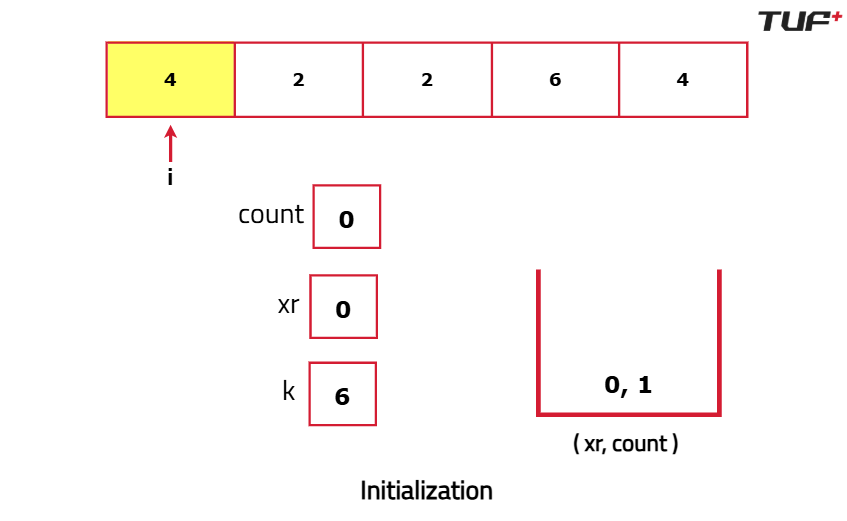
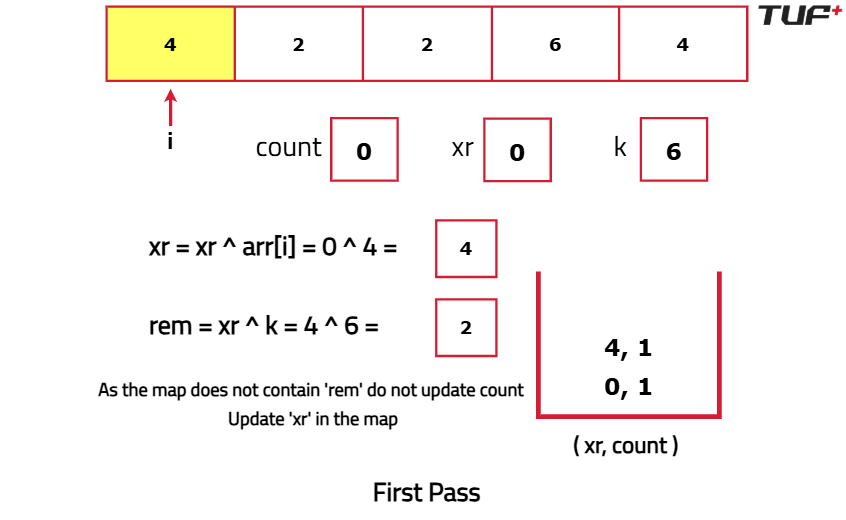
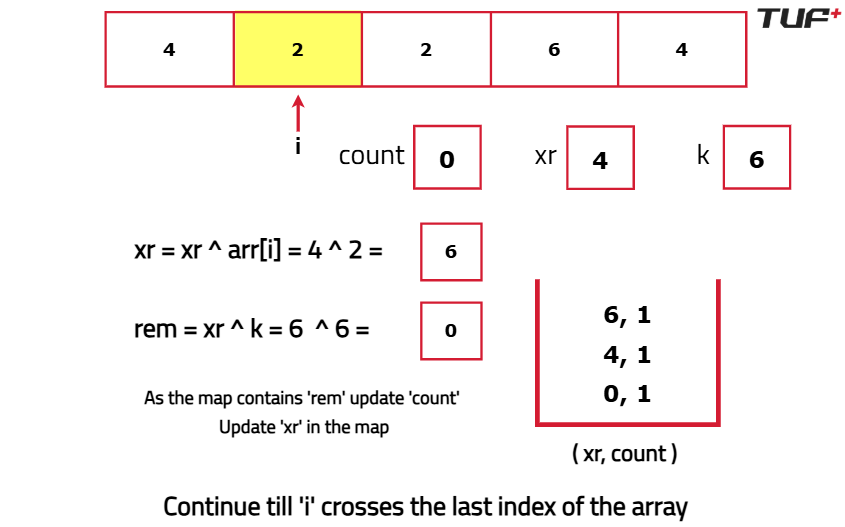
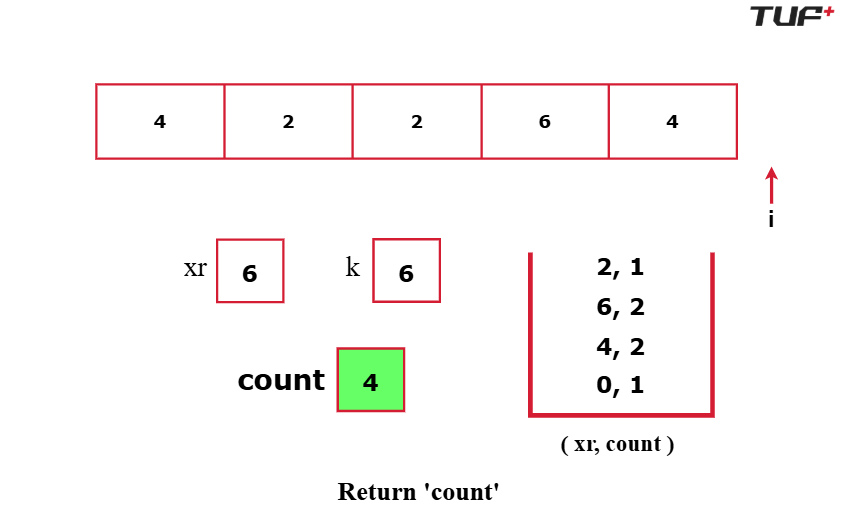

## Optimal Python Solution

In [24]:
class Solution:
    def subarraysWithXorK(self, nums, k):
        n = len(nums)
        xr = 0
        mpp = {}
        # setting the value of 0.
        mpp[xr] = mpp.get(xr, 0) + 1
        cnt = 0

        for i in range(n):
            # prefix XOR till index i:
            xr = xr ^ nums[i]

            # By formula: x = xr ^ k:
            x = xr ^ k

            # add the occurrence of xr ^ k to the count:
            cnt += mpp.get(x, 0)

            # Insert the prefix xor till index i into the map:
            mpp[xr] = mpp.get(xr, 0) + 1

        return cnt

In [25]:
if __name__ == "__main__":
    a = [4, 2, 2, 6, 4]
    k = 6

    # Create an instance of the Solution class
    solution = Solution()

    # Function call to get the result
    ans = solution.subarraysWithXorK(a, k)

    print("The number of subarrays with XOR k is:", ans)

The number of subarrays with XOR k is: 4


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O(N) or O(N * logN), where N is the size of the array. If we use an unordered_map in C++, the time complexity is O(N). However, with a map data structure, the time complexity is O(N * logN). In the worst case for an unordered_map, the searching time can increase to O(N), making the overall time complexity O($N^2$).

**Space Complexity:**

The Space Complexity will be O(N), as we are using a map data structure.

## FAQs & Interview Follow-ups :

**Why does XOR work for subarray problems?**
```
XOR has the property that A⊕B=C⟹A=B⊕C. Using this property, you can efficiently determine if a subarray with the desired XOR exists by comparing the current prefix XOR with previously seen values.
```

**What happens if there are overlapping subarrays with the same XOR?**
```
The hash map keeps track of the frequency of each prefix XOR. If multiple subarrays end at different indices with the same XOR, they are all counted correctly. Example: Input: nums = [4, 2, 2, 6], k = 6 Output: 3 (Subarrays: [4, 2], [2, 6], [4, 2, 2, 6])
```

**What if you need to count subarrays whose XOR alternates between two values, k1 and k2?**
```
Maintain two separate hash maps for k1 and k2. Alternate between the two as you traverse the array, counting valid subarrays for each condition.
```

**What are the limits of XOR-based approaches for subarray problems?**
```
XOR-based approaches are limited to problems where the target condition involves XOR properties. They cannot be directly applied to sum, product, or other arithmetic-based subarray problems.
```

# 7. Merge Overlapping Subintervals :

## Problem Statement :

Given an array of intervals where intervals[i] = [starti, endi], merge all overlapping intervals and return an array of the non-overlapping intervals that cover all the intervals in the input.

You can return the intervals in any order.


### Examples :

**Example 1:**
```
Input: intervals = [[1,5],[3,6],[8,10],[15,18]]
Output: [[1,6],[8,10],[15,18]]

Explanation: Intervals [1,5] and [3,6] overlap, and hence they are merged into [1,6].
```

**Example 2:**
```
Input: intervals = [[5,7],[1,3],[4,6],[8,10]]
Output: [[1,3],[4,7],[8,10]]

Explanation: Intervals [4,6] and [5,7] overlap and are merged into [4,7].
```

```
Constraints:
1 <= intervals.length <= 10⁵
0 <= starti <= endi <= 10⁵
```

# Brute Force Solution

### Intuition

Think of the intervals as blocks on a timeline. The process is like repeatedly scanning through the blocks and whenever two blocks overlap, they are merged into one bigger block. This scanning and merging continues until no further overlaps are found, leaving only non-overlapping blocks.

### Approach

* Check if the list has zero or one interval; if so, return it as is.
* Set a flag indicating that merging may be possible.

* While merging is possible :

```
Reset the flag at the start of each pass.
Compare each interval with all subsequent intervals.

If an overlap is detected:

Merge the two intervals into one combined interval.
Remove the second interval from the list.
Mark that a merge happened and restart the scanning process.
```

* When a complete pass finds no overlaps, return the final list of merged intervals.

## Brute Force Python Solution

In [26]:
class Solution:
    def mergeOverlap(self, arr):
        # Get the initial number of intervals
        n = len(arr)
        # If there are 0 or 1 intervals, no merging is needed
        if n <= 1:
            return arr

        # Flag to track whether any merge happened in the last pass
        mergedSomething = True
        # Keep repeating passes until a full pass finds no merge
        while mergedSomething:
            # Reset the flag at the start of each pass
            mergedSomething = False
            # Iterate over all interval indices i
            i = 0
            while i < len(arr) and not mergedSomething:
                # For each i, check all j > i to find an overlapping pair
                j = i + 1
                while j < len(arr):
                    # Extract start and end of interval i
                    a1 = arr[i][0]
                    # Extract start and end of interval i (end)
                    b1 = arr[i][1]
                    # Extract start of interval j
                    a2 = arr[j][0]
                    # Extract end of interval j
                    b2 = arr[j][1]

                    # Check if intervals i and j overlap (not (i ends before j starts or j ends before i starts))
                    if not (b1 < a2 or b2 < a1):
                        # Compute merged start as the minimum of the two starts
                        ns = min(a1, a2)
                        # Compute merged end as the maximum of the two ends
                        ne = max(b1, b2)
                        # Replace interval i with the merged interval
                        arr[i][0], arr[i][1] = ns, ne
                        # Remove interval j since it is now merged into i
                        del arr[j]
                        # Mark that a merge happened to trigger another pass
                        mergedSomething = True
                        # Break to restart scanning from the beginning in the next pass
                        break
                    j += 1
                i += 1

        # Return the fully merged list of intervals
        return arr

In [27]:
if __name__ == "__main__":
    sol = Solution()
    # Example input
    arr = [[1, 3], [2, 6], [8, 10], [15, 18]]

    # Output the merged intervals
    result = sol.mergeOverlap(arr)
    for interval in result:
        print(f"[{interval[0]}, {interval[1]}] ", end="")
    print()

[1, 6] [8, 10] [15, 18] 


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$), where N is the size of the array. 
In the worst case, each merge requires scanning the entire list again. For N intervals, this can lead to repeated scans after each merge, resulting inO($N^2$)) time complexity.

**Space Complexity:**

The Space Complexity will beO(1), as only a few extra variables and a flag are used..

# Optimal Solution

### Intuition

The Brute Force approach is efficient but can be simplified further. Think of the sorting as the first step in organizing the meetings so that you can efficiently determine which ones need merging. By sorting the intervals, we can easily check if the current interval overlaps with the previous one.

### Approach

* <b>Sorting:</b> First, sort the intervals based on the starting time.
* <b>Iterating and Merging:</b> Iterate through the sorted intervals, merging any overlapping intervals.
* <b>Result:</b> After all intervals are processed, the result array will contain the merged intervals.

## Dry Run

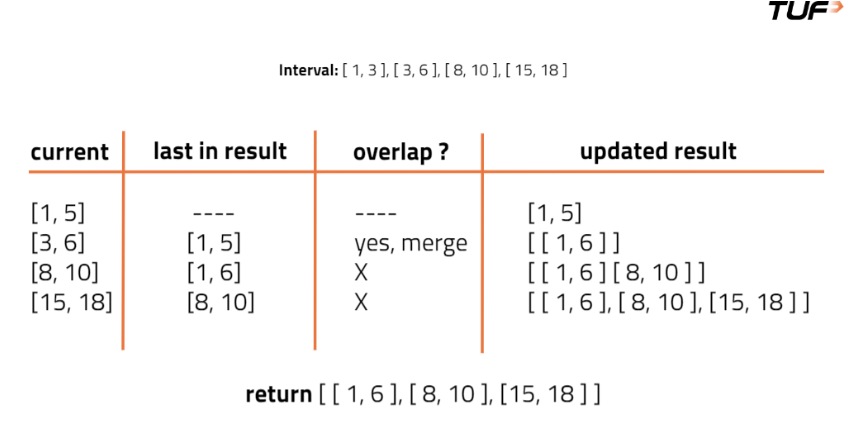

## Optimal Python Solution

In [28]:
class Solution:
    # Method to merge overlapping intervals
    def mergeOverlap(self, intervals):
        # If no intervals, return an empty result
        if not intervals:
            return []

        # Step 1: Sort intervals based on the start time of each interval
        intervals.sort(key=lambda x: x[0])

        # Step 2: List to store merged intervals
        result = []

        # Start by adding the first interval to the result
        result.append(intervals[0])

        # Iterate through the remaining intervals
        for i in range(1, len(intervals)):
            # If the current interval overlaps with the last added interval
            if intervals[i][0] <= result[-1][1]:
                # Merge the intervals by extending the end time of the last interval
                result[-1][1] = max(result[-1][1], intervals[i][1])
            else:
                # If no overlap, simply add the current interval to the result
                result.append(intervals[i])

        # Return the merged intervals
        return result

In [29]:
# Driver code
if __name__ == "__main__":
    sol = Solution()
    intervals = [[1, 3], [2, 6], [8, 10], [15, 18]]  # Example input
    
    # Output the merged intervals
    result = sol.mergeOverlap(intervals)
    for interval in result:
        print(f"[{interval[0]}, {interval[1]}]", end=" ")
    print()

[1, 6] [8, 10] [15, 18] 


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(n * log n) for sorting the intervals, plus O(n) for iterating over them. Thus, the total time complexity is O(n * log n).
```

**Space Complexity:**
```
The Space Complexity will be O(n) for storing the merged intervals.
```

## FAQs & Interview Follow-ups :

**Why do we need to sort the intervals first?**
```
Sorting the intervals ensures that we process them in increasing order of their starting points, which is crucial for efficiently identifying overlaps. Without sorting, we could encounter intervals out of order, making it difficult to determine whether two intervals overlap or not. Sorting allows us to handle overlapping intervals by simply comparing consecutive intervals.
```

**What happens if two intervals don’t overlap?**
```
If 2 intervals don't overlap, we simply add the current interval to the result list and move on to the next interval. There's no need to merge them, and they remain separate in the final output.
```

**How would the solution change if the intervals were not guaranteed to be sorted initially?**
```
If the intervals are not sorted, you need to sort them first based on their start times before applying the merging logic. Sorting takes O(n * log n) time, and once sorted, the merging process itself runs in O(n) time. This ensures that even if the input is unsorted, we can still merge the intervals efficiently.
```

**Can this approach be generalized to handle more complex cases, like intervals with multiple ranges (e.g., [start1, end1], [start2, end2], etc.)?**
```
Yes, the general approach of sorting and merging applies to cases with more complex or multi-range intervals. You can extend this strategy by sorting the intervals based on their start times, and then merging ranges that overlap. The logic for merging remains the same — just compare the current interval with the last merged interval and adjust accordingly.
```

# 8. Merge 2 Sorted Arrays without Extra Space :

## Problem Statement :

Given two integer arrays nums1 and nums2. Both arrays are sorted in non-decreasing order. Merge both the arrays into a single array sorted in non-decreasing order.

The final sorted array should be stored inside the array nums1 and it should be done in-place.

nums1 has a length of m + n, where the first m elements denote the elements of nums1 and rest are 0s.
nums2 has a length of n.

### Examples :

**Example 1:**
```
Input: nums1 = [-5, -2, 4, 5], nums2 = [-3, 1, 8]
Output: [-5, -3, -2, 1, 4, 5, 8]

Explanation:
The merged array is: [-5, -3, -2, 1, 4, 5, 8], where [-5, -2, 4, 5] are from nums1 and [-3, 1, 8] are from nums2.
```

**Example 2:**
```
Input: nums1 = [0, 2, 7, 8], nums2 = [-7, -3, -1]
Output: [-7, -3, -1, 0, 2, 7, 8]

Explanation:
The merged array is: [-7, -3, -1, 0, 2, 7, 8], where [0, 2, 7, 8] are from nums1 and [-7, -3, -1] are from nums2.
```

**Example 3:**
```
Input: nums1 = [1, 3, 5], nums2 = [2, 4, 6, 7]
Output: [1, 2, 3, 4, 5, 6, 7]
```

```
Constraints:
n == nums2.length.
m + n == nums1.length.
0 <= n, m <= 1000
-10^4 <= nums1[i], nums2[i] <= 10^4
Both nums1 and nums2 are sorted in non-decreasing order.
```

# Brute Force Solution

### Intuition

The naive idea is to use the sorted property of array. As the given arrays are sorted, use 2 pointer approach to get a third array by simply comparing the elements at both the pointers - the third array contains all the elements from the given two arrays in the sorted order. Now, from the sorted third array, again fill back the given two arrays.

### Approach

* Declare a third array, arr3[] of size (n + m), and two pointers i.e. left and right, one pointing to the first index of arr1[] and the other pointing to the first index of arr2[].
* Now, if arr1[left] is less than arr2[right], insert the element arr1[left] into the third array and increase the left pointer by 1.
* If arr2[right] less than arr1[left], insert the element arr2[right] into the third array and increase the right pointer by 1.
* If arr1[left] is equal to arr2[right], insert any of the elements and increase that particular pointer by 1.
* If one of the pointers reaches the end, then only move the other pointer and insert the rest of the elements of that particular array into the third array i.e. arr3[].
* If we move the pointer like the above, we will get the third array in the sorted order. Now, from sorted array arr3[], copy all the elements back to arr1[].

## Brute Force Python Solution

In [30]:
from typing import List

class Solution:
    # Function to merge two sorted arrays nums1 and nums2
   def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        # Declare a 3rd array and 2 pointers:
        merged = [0] * (m + n)
        left = 0
        right = 0
        index = 0

        """ Insert elements from nums1 and nums2 into
        merged array using left and right pointers """
        while left < m and right < n:
            if nums1[left] <= nums2[right]:
                merged[index] = nums1[left]
                left += 1
            else:
                merged[index] = nums2[right]
                right += 1
            index += 1

        # If right pointer reaches the end of nums2:
        while left < m:
            merged[index] = nums1[left]
            left += 1
            index += 1

        # If left pointer reaches the end of nums1:
        while right < n:
            merged[index] = nums2[right]
            right += 1
            index += 1

        """ Copy elements from merged array
        array back to nums1 """
        for i in range(m + n):
            nums1[i] = merged[i]

In [31]:
if __name__ == "__main__":
    nums1 = [-5, -2, 4, 5, 0, 0, 0]
    nums2 = [-3, 1, 8]
    m = 4
    n = 3

    # Create an instance of the Solution class
    sol = Solution()

    sol.merge(nums1, m, nums2, n)

    # Output the merged arrays
    print("The merged arrays is:")
    print("nums1[] =", nums1)

The merged arrays is:
nums1[] = [-5, -3, -2, 1, 4, 5, 8]


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N+M) + O(N+M), where N and M are the sizes of the given arrays. O(N+M) is for copying the elements from nums1[] and nums2[] to the third array. Another O(N+M) Time Complexity is for filling back nums1[].
```

**Space Complexity:**
```
The Space Complexity will be O(N+M) for using an extra array of size N+M.
```

# Optimal Solution - I

### Intuition

Since both arrays are sorted, the largest element must be at the end of either nums1 or nums2. So, use two pointers at the ends of nums1 and nums2, and another pointer at the end of the total space in nums1. Compare the elements from the back and place the larger one at the end of nums1. This ensures an in-place merge in linear time without extra space.

### Approach

* Declare two pointers i.e. left and right. The left pointer will point to m-1 (Basically the maximum element of the array). The right pointer will point to the first index of the arr2[] (Basically the minimum element of the array).
* Now, the left pointer will move toward index 0 and the right pointer will move towards the index m-1. While moving the two pointers, if arr1[left] is greater than arr2[right], then we will swap the elements and move the pointers to the next positions.
* If arr1[left] is less than or equal to arr2[right], we will stop moving the pointers as arr1[] and arr2[] are containing correct elements.
* Now, arr1[] will contain all smaller elements and arr2[] will contain all bigger elements. Finally, we will sort the two arrays and put the elements of arr2[] back to arr1[] from index m to (m+n-1).

## Dry Run

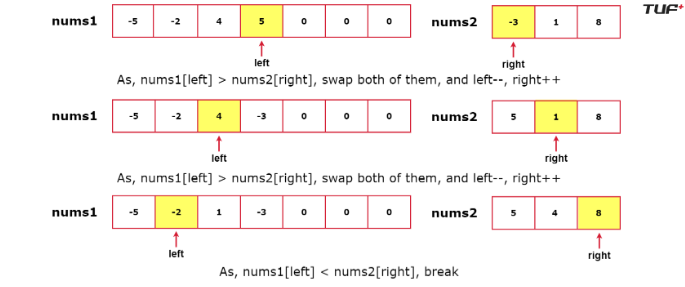
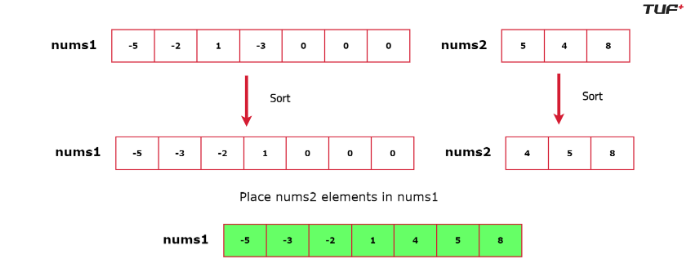

## Optimal Python Solution - I

In [ ]:
from typing import List

class Solution:
    # Function to merge two sorted arrays nums1 and nums2
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        # Pointer for nums1 (end of valid elements)
        left = m - 1
        
        # Pointer for nums2 (beginning of valid elements)
        right = 0
        
        """ Swap the elements until nums1[left]
        is smaller than nums2[right]"""
        while left >= 0 and right < n:
            if nums1[left] > nums2[right]:
                nums1[left], nums2[right] = nums2[right], nums1[left]
                left -= 1
                right += 1
            #break out of loop if nums1[left] > nums2[right]    
            else:
                break
        
        # Sort nums1 from index 0 to m-1
        nums1[:m] = sorted(nums1[:m])
        
        # Sort nums2 from start to end
        nums2.sort()
        
        # Put the elements of nums2 in nums1
        for i in range(m, m + n):
            nums1[i] = nums2[i - m]

In [ ]:
    # Example usage
    def main(self):
        nums1 = [-5, -2, 4, 5, 0, 0, 0]
        nums2 = [-3, 1, 8]
        m, n = 4, 3
        
        # Create an instance of the Solution class
        sol = Solution()
        
        sol.merge(nums1, m, nums2, n)
        
        # Output the merged arrays
        print("The merged arrays are:")
        print("nums1[] = ", end="")
        print(nums1)
    
# Run main function when the script is executed directly
if __name__ == "__main__":
    Solution().main()

## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(min(N, M)) + O(N * logN) + O(M * logM), where N and M are the sizes of the given arrays. O(min(N, M)) is for swapping the array elements, and O(N * logN) and O(M * logM) are for sorting the two arrays.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used apart from the input array.
```

# Optimal Solution - II

### Intuition

Use 2-pointer approach to merge 2 arrays in-place for the most optimized solution. Assume the 2 arrays as a single continuous array and initially, as the ask is to merge both the arrays in one array eventually, we will place the left pointer at the first index and the right pointer at the (left+gap) index of that continuous array, where gap is Initial gap = ceil((size of arr1[] + size of arr2[]) / 2). Now we will compare elements at both the pointers and if arr[left] is greater than arr[right], will swap as we want the merged array in non-decreasing order. After each iteration update the gap value. It will ensure to merge the 2 arrays without using extra space.

### Approach

* Assume the 2 arrays as a single array and calculate the gap value i.e. ceil((size of arr1[] + size of arr2[]) / 2).
* Now, until the gap value becomes 0, place two pointers in their correct position like the left pointer at index 0 and the right pointer at index (left + gap).
* Again, iterate until the right pointer reaches the end i.e. (n + m). Inside the loop, check if the left pointer is inside arr1[] and the right pointer is in arr2[]. Then compare arr1[left] and arr2[right-n] and swap them if arr1[left] is greater than arr2[right-n].
* If both the pointers are in arr2[], then compare arr1[left-n] and arr2[right-n] and swap them if arr1[left-n] is greater than arr2[right-n].
* If both the pointers are in arr1[], then compare arr1[left] and arr2[right] and swap them if arr1[left] is greater than arr2[right].
* After the right pointer reaches the end, we will decrease the value of the gap and it will become ceil(current gap / 2).
* Finally, after performing all the operations, copy the elements of arr2 to arr1 and we will get the merged sorted array.

## Optimal Python Solution - II

In [32]:
from typing import List

class Solution:
    # Function to merge two sorted arrays nums1 and nums2
    def merge(self, nums1, m, nums2, n):
        len = n + m
        gap = (len // 2) + (len % 2)

        while gap > 0:
            left = 0
            right = left + gap
            
            while right < len:
                
                # When left in nums1[] and right in nums2[]
                if left < m and right >= m:
                    self.swapIfGreater(nums1, nums2, left, right - m)
                # When both pointers in nums2[]
                elif left >= m:
                    self.swapIfGreater(nums2, nums2, left - m, right - m)
                # When both pointers in nums1[]
                else:
                    self.swapIfGreater(nums1, nums1, left, right)
                    
                # Increment the pointers by 1 each
                left += 1
                right += 1
                
            # If gap is equal, break out of the loop
            if gap == 1:
                break
            gap = (gap // 2) + (gap % 2)

        # Copy elements of nums2 into nums1
        for i in range(m, m + n):
            nums1[i] = nums2[i - m]

    # Utility function to swap elements if needed
    def swapIfGreater(self, arr1, arr2, idx1, idx2):
        if arr1[idx1] > arr2[idx2]:
            arr1[idx1], arr2[idx2] = arr2[idx2], arr1[idx1]

In [33]:
if __name__ == "__main__":
    nums1 = [-5, -2, 4, 5, 0, 0, 0]
    nums2 = [-3, 1, 8]
    m, n = 4, 3

    # Create an instance of the Solution class
    sol = Solution()

    sol.merge(nums1, m, nums2, n)

    # Output the merged arrays
    print("The merged array is:")
    print("nums1[] =", nums1)

The merged array is:
nums1[] = [-5, -3, -2, 1, 4, 5, 8]


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O((N+M) * log(N+M)), where N and M are the sizes of the given arrays. The gap is ranging from N+M to 1 and every time the gap gets divided by 2. So, the time complexity of the outer loop will be O(log(N+M)). Now, for each value of the gap, the inner loop can at most run for (N+M) times. So, the time complexity of the inner loop will be O(N+M). So, the overall time complexity will be O((N+M) * log(N+M)).
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used apart from the input array.
```

# Optimal Solution - III

### Intuition

Since both arrays are already sorted, the largest element in the merged array must come from the end of one of the two arrays. By comparing the elements from the back and placing the larger one at the last available position, the merging can be done efficiently without using extra space. Repeating this step ensures that all positions are filled in correct order, ultimately producing a fully sorted array within the first array itself.

### Approach

* Start comparing elements from the end of both arrays.
* Pick the larger element and place it at the current last available position in the first array.
* Move the pointer of the array from which the element was taken one step back.
* Repeat this process until all elements from the second array are placed.
* The first array now contains all elements in sorted order.

## Optimal Python Solution - III

In [34]:
class Solution:
    # Function to merge two sorted arrays nums1 and nums2
    def merge(self, nums1, m, nums2, n):
        i, j = m - 1, n - 1
        ind = m + n - 1

        # Until all the elements from nums2 are placed
        while j >= 0:
            # If nums1[i] >= nums2[j]
            if i >= 0 and nums1[i] >= nums2[j]:
                # Place the element
                nums1[ind] = nums1[i]

                # Move both indices back by one place
                ind -= 1
                i -= 1
            # Otherwise
            else:
                # Place the element
                nums1[ind] = nums2[j]

                # Move both indices back by one place
                ind -= 1
                j -= 1

In [35]:
if __name__ == "__main__":
    nums1 = [-5, -2, 4, 5, 0, 0, 0]
    nums2 = [-3, 1, 8]
    m, n = 4, 3

    # Create an instance of the Solution class
    sol = Solution()
    sol.merge(nums1, m, nums2, n)

    # Output the merged arrays
    print("The merged arrays is:")
    print("nums1[] =", *nums1)

The merged arrays is:
nums1[] = -5 -3 -2 1 4 5 8


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N + M), where N and M are the sizes of the given arrays.
This is because a single linear traversal is performed from the end of both arrays, with each element being processed at most once.
```

**Space Complexity:**
```
The Space Complexity will be O(1), as only couple of variables are used.
```

## FAQs & Interview Follow-ups :

**Why start merging from the end instead of the beginning?**
```
Placing elements from the end avoids shifting elements, making the process O(n + m) time instead of O((m+n) log(m+n)) using sorting.
```

**Can this be solved using extra space?**
```
Yes, but in-place merging is required, so no extra space should be used.
```

**How would you modify this if nums1 did not have extra space?**
```
Use a temporary array, merge both, then copy back into nums1.
```

**How does this problem relate to merge sort?**
```
This is the merge step of merge sort, combining two sorted arrays efficiently.
```

# 9. Find the Repeating and Missing Number :

## Problem Statement :

Given an integer array nums of size n containing values from [1, n] and each value appears exactly once in the array, except for A, which appears twice and B which is missing.


Return the values A and B, as an array of size 2, where A appears in the 0-th index and B in the 1st index.


<b>Note: You are not allowed to modify the original array.</b>


### Examples :

**Example 1:**
```
Input: nums = [3, 5, 4, 1, 1]
Output: [1, 2]

Explanation:
1 appears two times in the array and 2 is missing from nums.
```

**Example 2:**
```
Input: nums = [1, 2, 3, 6, 7, 5, 7]
Output: [7, 4]

Explanation:
7 appears two times in the array and 4 is missing from nums.
```

```
Constraints:
n == nums.length
1 <= n <= 10^5
n - 2 elements in nums appear exactly once and are valued between [1, n].
1 element in nums appears twice, and is valued between [1, n].
```

# Brute Force Solution

### Intuition

The naive way is to count the occurrence in the given array using linear search, for each number between 1 to N. The element which occurs twice will be the repeating number and the number with 0 occurrence will be the missing number.

### Approach

* Iterate in array from 1 to N & for each integer, i, count its occurrence in the given array using linear search.* 
Store those two elements that have the occurrence of 2 and 0. Finally, return the elements.

## Brute Force Python Solution

In [36]:
class Solution:
    # Function to find repeating and missing numbers
    def findMissingRepeatingNumbers(self, nums):
        
        # Size of the array
        n = len(nums)
        repeating, missing = -1, -1

        # Find the repeating and missing number:
        for i in range(1, n + 1):
            
            # Count the occurrences:
            cnt = 0
            
            for j in range(n):
                if nums[j] == i:
                    cnt += 1

            # Check if i is repeating or missing
            if cnt == 2:
                repeating = i
            elif cnt == 0:
                missing = i

            # If both repeating and missing
            # are found, break out of loop
            if repeating != -1 and missing != -1:
                break
        
        # Return [repeating, missing]
        return [repeating, missing]

In [37]:
if __name__ == "__main__":
    nums = [3, 1, 2, 5, 4, 6, 7, 5]
    
    # Create an instance of Solution class
    sol = Solution()

    result = sol.findMissingRepeatingNumbers(nums)
    
    # Print the repeating and missing numbers found
    print(f"The repeating and missing numbers are: {{{result[0]}, {result[1]}}}")

The repeating and missing numbers are: {5, 8}


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$), where N is the size of the array. This is because we are using nested loops to count occurrences of every element between 1 to N.

**Space Complexity:**

The Space Complexity will be O(1) as no extra space is used.

# Better Solution

### Intuition

The better way is, instead of counting the occurrences every time, use the hashing technique to store the frequency of each element between 1 to N. Now, the element with frequency 2 will be the repeating number and the element with frequency 0 will be the missing number.

### Approach

* The range of the number is 1 to N. Hence we can declare a hash array of size N+1 (as we want to store the frequency of N as well).
* Iterate all the elements of the given array and update the hash array when an element is encountered.
* Now, iterate in the hash array and return the two elements with frequencies 2 and 0.

## Better Python Solution

In [38]:
class Solution:
    # Function to find repeating and missing numbers
    def findMissingRepeatingNumbers(self, nums):
        
        # Size of the array
        n = len(nums)
        
        # Hash array to count occurrences
        hash = [0] * (n + 1)
        
        # Update the hash array:
        for num in nums:
            hash[num] += 1

        repeating = -1
        missing = -1
        
        # Find the repeating and missing number:
        for i in range(1, n + 1):
            if hash[i] == 2:
                repeating = i
            elif hash[i] == 0:
                missing = i

            """ If both repeating and missing
            are found, break out of loop"""
            if repeating != -1 and missing != -1:
                break
        
        # Return [repeating, missing]
        return [repeating, missing]

In [39]:
if __name__ == "__main__":
    nums = [3, 1, 2, 5, 4, 6, 7, 5]
    
    # Create an instance of Solution class
    sol = Solution()
    
    result = sol.findMissingRepeatingNumbers(nums)
    
    # Print the repeating and missing numbers found
    print(f"The repeating and missing numbers are: {{{result[0]}, {result[1]}}}")

The repeating and missing numbers are: {5, 8}


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2*N), for using two loops where each is running N times, where N is the size of the array.
```

**Space Complexity:**
```
The Space Complexity will be O(N) for using a hash array.
```

# Optimal Solution-I

### Intuition

The optimal way is to convert the given problem into mathematical equations. Since we have two variables i.e. missing and repeating, try to form two linear equations & find the values of two variables using those equations.

### Approach

* First, find out the values of S and Sn, where S is the sum of all the elements of the array and Sn is the sum of natural numbers from 1 to N. Then calculate S - Sn and S - Sn = X - Y, where X is repeating number and Y is the missing number.
* Next, find the values of S2 and S2n , where S2 is the summation of squares of all the elements in the given array and S2n is summation of squares of the first N numbers ((N*(N+1)*(2N+1))/6). Then calculate S2 - S2n and S2 - S2n = X2 - Y2.
* From the above steps X+Y = (S2 - S2n) / (X-Y)
* After performing steps 1 and 2, we will be having the values of X + Y and X - Y. Now, by substitution of values, we can easily find the values of X and Y. Finally, return X and Y.

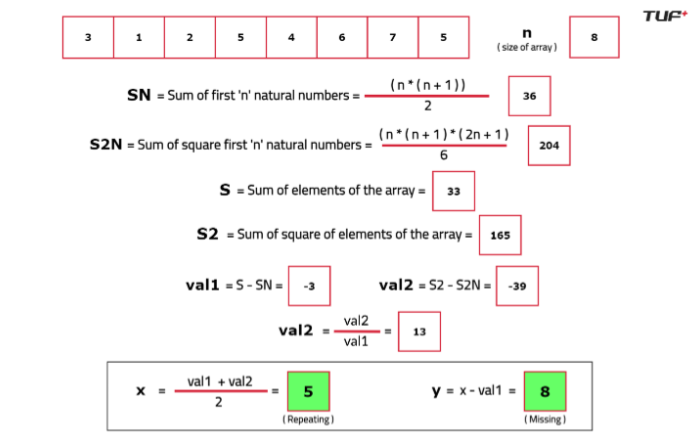

## Optimal Python Solution - I

In [40]:
class Solution:
    # Function to find repeating and missing numbers
    def findMissingRepeatingNumbers(self, nums):
        
        # Size of the array
        n = len(nums)

        # Sum of first n natural numbers
        SN = (n * (n + 1)) // 2

        # Sum of squares of first n natural numbers
        S2N = (n * (n + 1) * (2 * n + 1)) // 6

        """ Calculate actual sum (S) and sum 
            of squares (S2) of array elements """
        S = 0
        S2 = 0
        for num in nums:
            S += num
            S2 += num * num

        # Compute the difference values
        val1 = S - SN

        # S2 - S2n = X^2 - Y^2
        val2 = S2 - S2N

        # Calculate X + Y using X + Y = (X^2 - Y^2) / (X - Y)
        val2 = val2 // val1

        """ Calculate X and Y from X + Y and X - Y
            X = ((X + Y) + (X - Y)) / 2
            Y = X - (X - Y) """
        x = (val1 + val2) // 2
        y = x - val1

        # Return the results as [repeating, missing]
        return [int(x), int(y)]

In [41]:
nums = [3, 1, 2, 5, 4, 6, 7, 5]

# Create an instance of Solution class
sol = Solution()

result = sol.findMissingRepeatingNumbers(nums)

# Print the repeating and missing numbers found
print(f"The repeating and missing numbers are: {{{result[0]}, {result[1]}}}")

The repeating and missing numbers are: {5, 8}


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), as a single loop is used, where N is the size of the given array.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no extra space is used.
```

# Optimal Solution-II

### Intuition

Another optimal solution is to use the XOR operation to find both the repeating and missing numbers. First, compute the XOR of the repeating number (X) and the missing number (Y). Determine the position of the first differing bit from the right between X and Y, which corresponds to the first set bit in (X^Y). Based on this position, group all elements (both from the array and from 1 to N) into two distinct groups. Identify which number belongs to the group where the first set bit is set, which indicates the repeating number, and the other number as the missing one.

### Approach

* For the first step, iterate and calculate the XOR of all the array elements and the numbers between 1 to N. Let’s call this value xr.
* In order to find the position of the first set bit from the right, either use a loop or perform AND of the xr and negation of (xr-1) i.e. (xr & ~(xr-1)).
* Now, take two variables i.e. zero and one & check the bit of that position for every element (array elements as well as numbers between 1 to N). If the bit is 1: We will XOR that element with variable one. If the bit is 0, XOR that element with variable zero.
* Finally, we have two variables i.e. two numbers zero and one. Among them, one is repeating and the other is missing. It’s time to identify them.
* Traverse the entire array and check how many times variable zero appears. If it appears twice, it will be the repeating number, otherwise, it will be the missing. Now, based on variable zero’s identity, determine in which category, variable one belongs.

## Optimal Python Solution - II

In [42]:
class Solution:
    # Function to find repeating and missing numbers
    def findMissingRepeatingNumbers(self, nums):
        
        # size of the array
        n = len(nums)

        xr = 0

        for i in range(n):
            # XOR of all elements in nums
            xr = xr ^ nums[i] 
            
            # XOR of numbers from 1 to n
            xr = xr ^ (i + 1)  

        # Get the rightmost set bit in xr
        number = (xr & ~(xr - 1))

        # Group the numbers based on the differentiating bit
        # Number that falls into the 0 group
        zero = 0 
        
        # Number that falls into the 1 group
        one = 0  

        for i in range(n):
            """ Check if nums[i] belongs to the 1 group
             based on the differentiating bit"""
            if (nums[i] & number) != 0:
                
                # XOR operation to find numbers in the 1 group
                one = one ^ nums[i]
                
            else:
                # XOR operation to find numbers in the 0 group
                zero = zero ^ nums[i]

        # Group numbers from 1 to n based on differentiating bit
        for i in range(1, n + 1):
            
            # Check if i belongs to the 1 group 
            # based on the differentiating bit
            if (i & number) != 0:
                # XOR operation to find numbers in the 1 group
                one = one ^ i
                
            else:
                # XOR operation to find numbers in the 0 group
                zero = zero ^ i

        # Count occurrences of zero in nums
        cnt = 0

        for i in range(n):
            if nums[i] == zero:
                cnt += 1

        if cnt == 2:
            """ zero is the repeating number,
             one is the missing number"""
            return [zero, one]

        """ one is the repeating number, 
        zero is the missing number"""
        return [one, zero]

In [43]:
if __name__ == "__main__":
    nums = [3, 1, 2, 5, 4, 6, 7, 5]
    
    # Create an instance of Solution class
    sol = Solution()

    result = sol.findMissingRepeatingNumbers(nums)

    # Print the repeating and missing numbers found
    print(f"The repeating and missing numbers are: {{{result[0]}, {result[1]}}}")

The repeating and missing numbers are: {5, 8}


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), using only one loop running for N times, where N is the size of the given array.
```

**Space Complexity:**
```
The Space Complexity will be O(1), as no extra space is used.
```

## FAQs & Interview Follow-ups :

**How does sorting help?**
```
After sorting, adjacent duplicates appear together, making them easy to detect. Missing numbers are found by checking consecutive values.
```

**How would you modify this if multiple numbers were duplicated or missing?**
```
Use a hash table to track frequencies (O(n) space). Extend XOR approach to detect multiple values.
```

**How does this change for an unsorted list with arbitrary numbers?**
```
Use a hash set or frequency array instead of 1 to n assumption.
```

# 10. Count Inversions :